In [33]:
#import madules 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns 
import statsmodels.api as sm
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from time import time
%matplotlib inline


In [34]:
#read dataset 
soil_data = pd.read_csv("soil_data.csv")
train_timeseries = pd.read_csv("train_timeseries.csv")
validation_timeseries = pd.read_csv("validation_timeseries.csv")
test_timeseries = pd.read_csv("test_timeseries.csv")

In [39]:
soil_data.shape,train_timeseries.shape,test_timeseries.shape, validation_timeseries.shape

((3109, 32), (19300680, 21), (2271948, 21), (2268840, 21))

### initial exploration for Soil data

In [40]:
soil_data.columns

Index(['fips', 'lat', 'lon', 'elevation', 'slope1', 'slope2', 'slope3',
       'slope4', 'slope5', 'slope6', 'slope7', 'slope8', 'aspectN', 'aspectE',
       'aspectS', 'aspectW', 'aspectUnknown', 'WAT_LAND', 'NVG_LAND',
       'URB_LAND', 'GRS_LAND', 'FOR_LAND', 'CULTRF_LAND', 'CULTIR_LAND',
       'CULT_LAND', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'SQ6', 'SQ7'],
      dtype='object')

<Axes: xlabel='lon', ylabel='lat'>

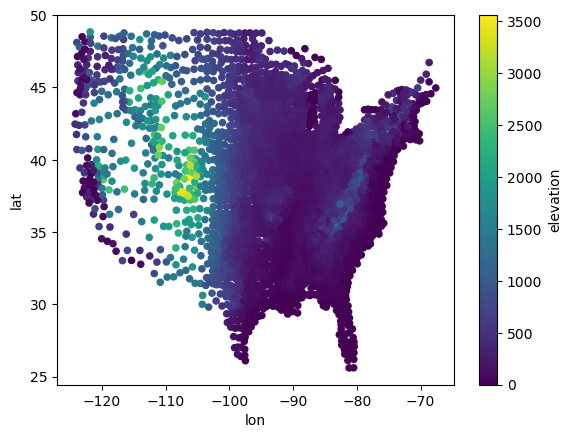

In [41]:

soil_data.plot.scatter(x = 'lon', y = 'lat', c = 'elevation',colormap = 'viridis')

<Axes: xlabel='fips', ylabel='elevation'>

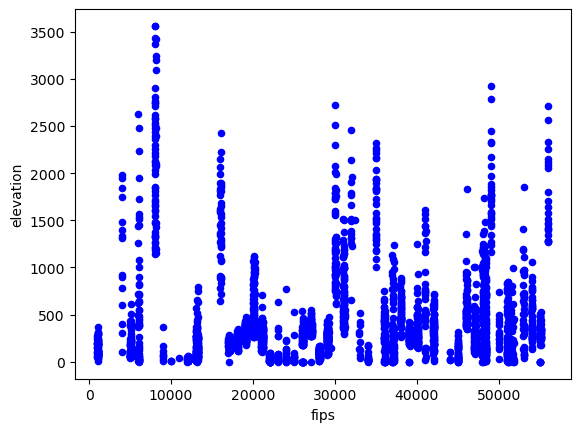

In [42]:
#Scatter plot of soil data with fips code and elevaton
soil_data.plot.scatter(x = 'fips', y  = 'elevation', color = 'blue')

## Initial data exploration of weather data

In [43]:
train_timeseries.columns

Index(['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score'],
      dtype='object')

In [44]:
train_timeseries

fips        date  PRECTOT      PS   QV2M    T2M  T2MDEW  T2MWET  \
0          1001  2000-01-01     0.22  100.51   9.65  14.74   13.51   13.51   
1          1001  2000-01-02     0.20  100.55  10.42  16.69   14.71   14.71   
2          1001  2000-01-03     3.65  100.15  11.76  18.49   16.52   16.52   
3          1001  2000-01-04    15.95  100.29   6.42  11.40    6.09    6.10   
4          1001  2000-01-05     0.00  101.15   2.95   3.86   -3.29   -3.20   
...         ...         ...      ...     ...    ...    ...     ...     ...   
19300675  56043  2016-12-27     0.16   82.88   1.63  -7.97  -13.49  -12.81   
19300676  56043  2016-12-28     0.02   83.33   1.41  -8.71  -14.10  -13.84   
19300677  56043  2016-12-29     0.00   83.75   1.59  -7.96  -13.30  -13.03   
19300678  56043  2016-12-30     1.22   82.49   2.63  -2.94   -7.40   -7.33   
19300679  56043  2016-12-31     0.44   82.19   1.75  -7.56  -11.98  -11.82   

          T2M_MAX  T2M_MIN  ...     TS  WS10M  WS10M_MAX  WS10M_MIN  \
0           20.96    11.46  ...  14.65   2.20       2.94       1.49   
1           22.80    12.61  ...  16.60   2.52       3.43       1.83   
2           22.73    15.32  ...  18.41   4.03       5.33       2.66   
3           18.09     2.16  ...  11.31   3.84       5.67       2.08   
4           10.82    -2.66  ...   2.65   1.60       2.50       0.52   
...           ...      ...  ...    ...    ...        ...        ...   
19300675    -1.39   -13.60  ...  -9.41   5.90       7.63       3.61   
19300676    -2.49   -13.56  ... -10.55   6.50      11.43       4.11   
19300677     0.42   -14.51  ... -10.29   4.29       6.24       2.03   
19300678     3.76    -6.86  ...  -4.14   4.98       7.34       1.99   
19300679    -0.95   -11.61  ... -10.17   2.31       3.47       0.41   

          WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
0                1.46   4.85       6.04       3.23         2.81    NaN  
1                1.60   5.33       6.13       3.72         2.41    NaN  
2                2.67   7.53       9.52       5.87         3.66    NaN  
3                3.59   6.73       9.31       3.74         5.58    1.0  
4                1.98   2.94       4.85       0.65         4.19    NaN  
...               ...    ...        ...        ...          ...    ...  
19300675         4.02   8.58      10.39       5.92         4.47    0.0  
19300676         7.32   9.92      14.49       7.26         7.22    NaN  
19300677         4.22   6.56      10.07       3.20         6.87    NaN  
19300678         5.35   7.28      10.12       3.24         6.89    NaN  
19300679         3.06   3.37       5.26       0.66         4.60    NaN  

[19300680 rows x 21 columns]

In [45]:
validation_timeseries

fips        date  PRECTOT      PS   QV2M    T2M  T2MDEW  T2MWET  \
0         1001  2017-01-01    32.50  100.02  10.47  14.69   14.47   14.47   
1         1001  2017-01-02    63.52  100.04  12.75  17.96   17.75   17.75   
2         1001  2017-01-03    18.82   99.69   9.74  14.24   13.44   13.44   
3         1001  2017-01-04     0.01  100.02   5.21   8.10    3.86    3.88   
4         1001  2017-01-05     0.01   99.89   4.54   5.91    2.20    2.22   
...        ...         ...      ...     ...    ...    ...     ...     ...   
2268835  56043  2018-12-27     0.14   82.71   1.54  -9.57  -14.20  -13.09   
2268836  56043  2018-12-28     0.02   83.14   1.32 -11.25  -15.98  -14.57   
2268837  56043  2018-12-29     0.34   82.78   1.75  -7.17  -12.62  -12.17   
2268838  56043  2018-12-30     3.17   81.97   2.72  -2.84   -7.14   -6.95   
2268839  56043  2018-12-31     1.39   83.16   1.03 -13.02  -18.93  -16.97   

         T2M_MAX  T2M_MIN  ...     TS  WS10M  WS10M_MAX  WS10M_MIN  \
0          17.68    10.53  ...  14.63   2.14       2.71       1.52   
1          20.30    16.14  ...  17.85   2.75       4.31       1.60   
2          18.48     9.29  ...  14.06   2.25       3.73       1.64   
3          11.74     2.12  ...   8.08   2.63       3.95       1.34   
4          13.07    -0.18  ...   5.85   1.76       2.76       0.47   
...          ...      ...  ...    ...    ...        ...        ...   
2268835    -6.23   -12.06  ... -10.10   2.01       3.56       0.23   
2268836    -7.03   -14.33  ... -12.36   1.66       3.12       0.09   
2268837     0.64   -14.85  ...  -8.09   3.64       4.71       2.47   
2268838     2.14    -8.49  ...  -3.63   5.26      11.19       1.70   
2268839    -9.70   -16.67  ... -13.06   4.53       9.66       0.82   

         WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
0               1.19   4.40       5.96       2.25         3.71    NaN  
1               2.71   5.50       8.16       4.05         4.11    NaN  
2               2.09   4.80       7.27       2.54         4.72    2.0  
3               2.60   4.98       6.16       3.36         2.80    NaN  
4               2.28   3.43       4.70       0.66         4.04    NaN  
...              ...    ...        ...        ...          ...    ...  
2268835         3.33   2.67       4.70       0.28         4.42    NaN  
2268836         3.04   2.40       5.58       0.08         5.50    NaN  
2268837         2.24   5.58       7.61       4.15         3.46    NaN  
2268838         9.49   7.56      13.59       3.11        10.49    NaN  
2268839         8.84   5.51      11.90       0.96        10.94    NaN  

[2268840 rows x 21 columns]

In [46]:
test_timeseries

fips        date  PRECTOT      PS  QV2M    T2M  T2MDEW  T2MWET  \
0         1001  2019-01-01     2.25  100.51  9.69  14.71   13.55   13.52   
1         1001  2019-01-02     4.94  100.48  8.65  13.05   11.83   11.74   
2         1001  2019-01-03    20.74  100.03  8.59  12.12   11.67   11.67   
3         1001  2019-01-04    16.17   99.47  7.93  11.80   10.38    9.59   
4         1001  2019-01-05     0.01  100.39  5.32   7.91    4.73    4.71   
...        ...         ...      ...     ...   ...    ...     ...     ...   
2271943  56043  2020-12-27     3.83   82.91  2.77  -3.61   -6.77   -5.19   
2271944  56043  2020-12-28     0.00   83.04  1.82  -7.31  -12.06   -9.68   
2271945  56043  2020-12-29     0.00   82.78  1.87  -7.38  -11.79   -9.59   
2271946  56043  2020-12-30     0.01   82.87  1.57  -6.40  -13.94  -10.17   
2271947  56043  2020-12-31     0.00   82.82  2.13  -3.83  -10.12   -6.98   

         T2M_MAX  T2M_MIN  ...     TS  WS10M  WS10M_MAX  WS10M_MIN  \
0          17.38    10.92  ...  14.63   1.20       1.50       0.79   
1          17.76     9.54  ...  13.06   1.02       1.35       0.32   
2          13.74    10.44  ...  12.12   1.83       4.23       0.34   
3          18.19     5.44  ...  11.72   3.75       5.25       2.34   
4          14.37     3.68  ...   7.75   2.32       2.90       1.69   
...          ...      ...  ...    ...    ...        ...        ...   
2271943     0.24    -9.07  ...  -5.88   2.98       6.04       0.72   
2271944    -1.48   -11.51  ... -10.61   1.83       2.81       0.10   
2271945    -0.88   -11.39  ... -10.81   2.70       6.22       0.18   
2271946     1.33   -12.16  ...  -8.74   2.93       4.10       1.62   
2271947     2.16    -8.57  ...  -6.61   2.16       3.72       0.31   

         WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE   score  
0               0.71   2.74       4.01       1.23         2.78  0.0000  
1               1.03   2.13       3.37       0.56         2.81     NaN  
2               3.88   3.41       7.49       0.72         6.77     NaN  
3               2.91   6.78       9.61       4.90         4.71     NaN  
4               1.21   4.42       5.87       3.15         2.72     NaN  
...              ...    ...        ...        ...          ...     ...  
2271943         5.31   4.56       7.68       1.03         6.66     NaN  
2271944         2.72   2.52       3.69       0.14         3.56     NaN  
2271945         6.04   3.84       7.66       0.29         7.37  3.5182  
2271946         2.48   4.42       6.05       2.79         3.26     NaN  
2271947         3.41   3.39       6.46       0.41         6.06     NaN  

[2271948 rows x 21 columns]

In [47]:
#Selecting only one country with fips code = 1003 
#and creating new train and validation dataset  
train_timeseries_1003 = train_timeseries[train_timeseries['fips']==1003]
validation_timeseries_1003 = validation_timeseries[validation_timeseries['fips']==1003]

In [48]:
train_timeseries_1003.shape, validation_timeseries_1003.shape

((6210, 21), (730, 21))

In [49]:
train_timeseries_1003.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score          float64
dtype: object

In [50]:
#converting date object to datetime 
train_timeseries_1003['date'] = pd.to_datetime(train_timeseries_1003['date'])
train_timeseries_1003.set_index('date', inplace = True)
#train_timeseries_1003_w=train_timeseries_1003.resample('W').mean()

validation_timeseries_1003['date'] = pd.to_datetime(validation_timeseries_1003['date'])
validation_timeseries_1003.set_index('date', inplace = True)
#validation_timeseries_1003_w = validation_timeseries_1003.resample('W').mean()

C:\Users\softe\AppData\Local\Temp\ipykernel_23804\2296463652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_timeseries_1003['date'] = pd.to_datetime(train_timeseries_1003['date'])
C:\Users\softe\AppData\Local\Temp\ipykernel_23804\2296463652.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_timeseries_1003['date'] = pd.to_datetime(validation_timeseries_1003['date'])


In [51]:
test_timeseries_1003 = test_timeseries[test_timeseries['fips']==1003]
test_timeseries_1003['date'] = pd.to_datetime(test_timeseries_1003['date'])
test_timeseries_1003.set_index('date', inplace = True)
#test_timeseries_1003_w=test_timeseries_1003.resample('W').mean()

C:\Users\softe\AppData\Local\Temp\ipykernel_23804\2046013489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_timeseries_1003['date'] = pd.to_datetime(test_timeseries_1003['date'])


In [52]:
description_1003 =train_timeseries_1003.describe()
description_1003

fips      PRECTOT           PS         QV2M          T2M  \
count  6210.0  6210.000000  6210.000000  6210.000000  6210.000000   
mean   1003.0     4.079502   101.329037    11.971424    19.733238   
std       0.0     8.903320     0.486522     4.819429     7.377757   
min    1003.0     0.000000    99.170000     1.740000    -3.340000   
25%    1003.0     0.000000   101.020000     7.860000    14.340000   
50%    1003.0     0.340000   101.280000    12.250000    20.770000   
75%    1003.0     4.137500   101.620000    16.315000    26.330000   
max    1003.0   134.510000   103.580000    21.100000    32.670000   

            T2MDEW       T2MWET      T2M_MAX      T2M_MIN    T2M_RANGE  \
count  6210.000000  6210.000000  6210.000000  6210.000000  6210.000000   
mean     15.441312    15.447121    24.745876    15.234527     9.511422   
std       7.438385     7.426657     7.217526     7.935247     2.919804   
min     -10.050000    -9.640000    -1.000000    -6.730000     1.390000   
25%      10.342500    10.350000    19.802500     8.890000     7.502500   
50%      17.195000    17.195000    25.730000    16.310000     9.520000   
75%      21.800000    21.800000    30.677500    22.680000    11.550000   
max      26.060000    26.060000    39.780000    27.440000    18.810000   

                TS        WS10M    WS10M_MAX    WS10M_MIN  WS10M_RANGE  \
count  6210.000000  6210.000000  6210.000000  6210.000000  6210.000000   
mean     19.978797     2.689277     3.654311     1.673647     1.980504   
std       7.138967     0.991610     1.288749     0.926248     0.904616   
min      -1.320000     0.540000     0.940000     0.010000     0.320000   
25%      14.562500     1.970000     2.710000     0.960000     1.360000   
50%      20.775000     2.530000     3.375000     1.680000     1.820000   
75%      26.450000     3.230000     4.350000     2.300000     2.370000   
max      32.760000    11.970000    15.710000     6.400000    10.720000   

             WS50M    WS50M_MAX    WS50M_MIN  WS50M_RANGE       score  
count  6210.000000  6210.000000  6210.000000  6210.000000  887.000000  
mean      4.445826     6.036965     2.726415     3.310507    0.844896  
std       1.546423     1.706427     1.662194     1.323408    1.179825  
min       1.000000     1.870000     0.020000     0.650000    0.000000  
25%       3.320000     4.950000     1.360000     2.380000    0.000000  
50%       4.260000     5.730000     2.590000     3.130000    0.143700  
75%       5.387500     6.780000     3.920000     4.010000    1.503800  
max      17.900000    22.990000    10.050000    16.040000    5.000000

In [53]:
description_1003.to_csv('summary_1003', sep = '\t')

In [54]:
train_timeseries_1003.isnull().sum()

fips              0
PRECTOT           0
PS                0
QV2M              0
T2M               0
T2MDEW            0
T2MWET            0
T2M_MAX           0
T2M_MIN           0
T2M_RANGE         0
TS                0
WS10M             0
WS10M_MAX         0
WS10M_MIN         0
WS10M_RANGE       0
WS50M             0
WS50M_MAX         0
WS50M_MIN         0
WS50M_RANGE       0
score          5323
dtype: int64

Text(0.5, 1.0, 'Histogram plot for the Drought Score')

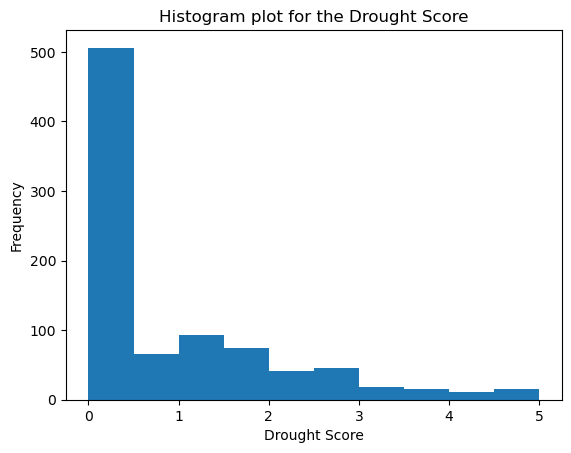

In [55]:

#initial exploration
#ploting the histogram for drought score values
plt.hist(train_timeseries_1003['score'], 10)
plt.xlabel('Drought Score')
plt.ylabel('Frequency')
plt.title('Histogram plot for the Drought Score')



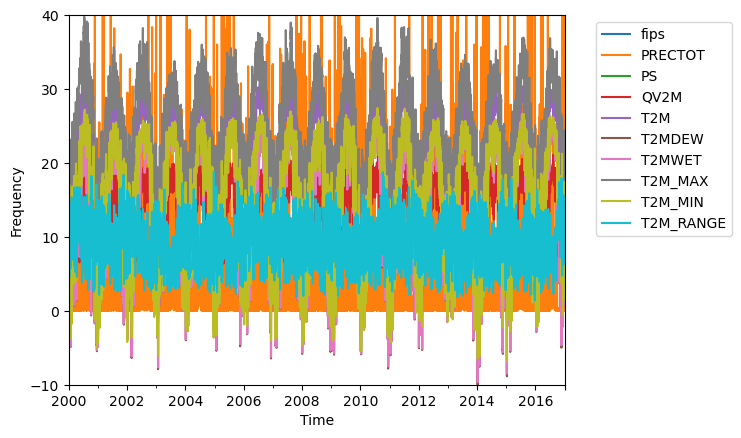

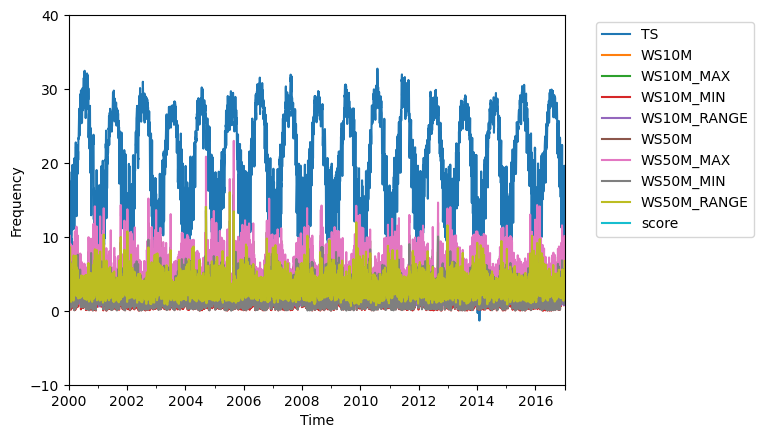

In [56]:
train_timeseries_1003.index = pd.DatetimeIndex(train_timeseries_1003.index, freq = train_timeseries_1003.index.inferred_freq)
num_features = len(train_timeseries_1003.columns)

# Plotting 10 features at a time in separate plots
for i in range(0, num_features, 10):
    subset = train_timeseries_1003.iloc[:, i:i+10]
    ax = subset.plot()
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')
    ax.set_ylim(-10, 40)
    plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [57]:
#interpolating all the null values
#train_timeseries_1003['score'] = train_timeseries_1003['score'].interpolate(method = 'linear', limit_direction = 'both')
#Interpolate train_timeseries_1003_w to fill last null value
train_timeseries_1003['score'] = train_timeseries_1003['score'].interpolate(method = 'linear', limit_direction = 'both')
validation_timeseries_1003['score'] = validation_timeseries_1003['score'].interpolate(method = 'linear', limit_direction = 'both')
test_timeseries_1003['score'] = test_timeseries_1003['score'].interpolate(method = 'linear', limit_direction = 'both')

C:\Users\softe\AppData\Local\Temp\ipykernel_23804\3971477922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_timeseries_1003['score'] = train_timeseries_1003['score'].interpolate(method = 'linear', limit_direction = 'both')
C:\Users\softe\AppData\Local\Temp\ipykernel_23804\3971477922.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_timeseries_1003['score'] = validation_timeseries_1003['score'].interpolate(method = 'linear', limit_direction = 'both')
C:\Users\softe\AppData\Local\Temp\

In [58]:
train_timeseries_1003.isnull().sum()

fips           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

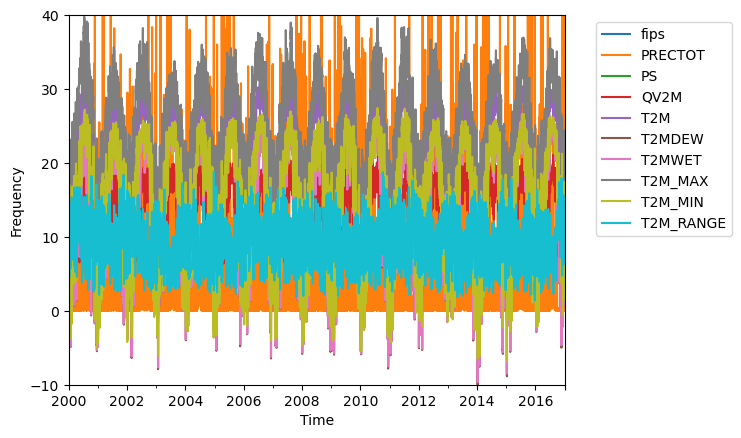

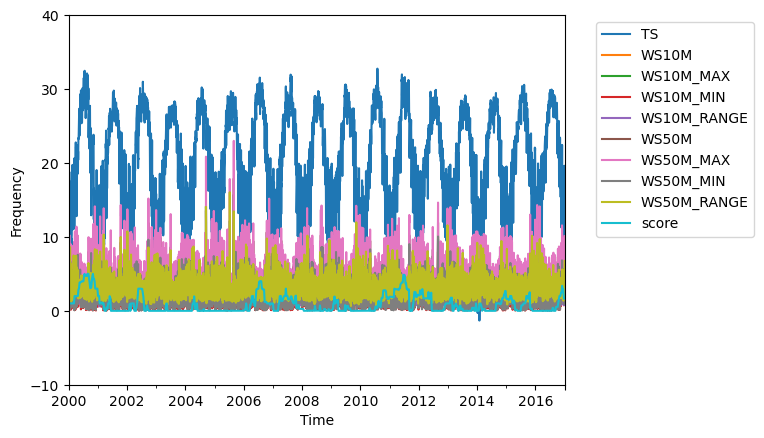

In [59]:

num_features = len(train_timeseries_1003.columns)

# Plotting 10 features at a time in separate plots
for i in range(0, num_features, 10):
    subset = train_timeseries_1003.iloc[:, i:i+10]
    ax = subset.plot()
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')
    ax.set_ylim(-10, 40)
    plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [60]:
#Interpolate train_timeseries_1003_w to fill last null value
#train_timeseries_1003_w['score'] = train_timeseries_1003_w['score'].interpolate(method = 'linear', limit_direction = 'both')
#validation_timeseries_1003_w['score'] = validation_timeseries_1003_w['score'].interpolate(method = 'linear', limit_direction = 'both')
#test_timeseries_1003_w['score'] = test_timeseries_1003_w['score'].interpolate(method = 'linear', limit_direction = 'both')

In [61]:
#train_timeseries_1003_w.shape, validation_timeseries_1003_w.shape

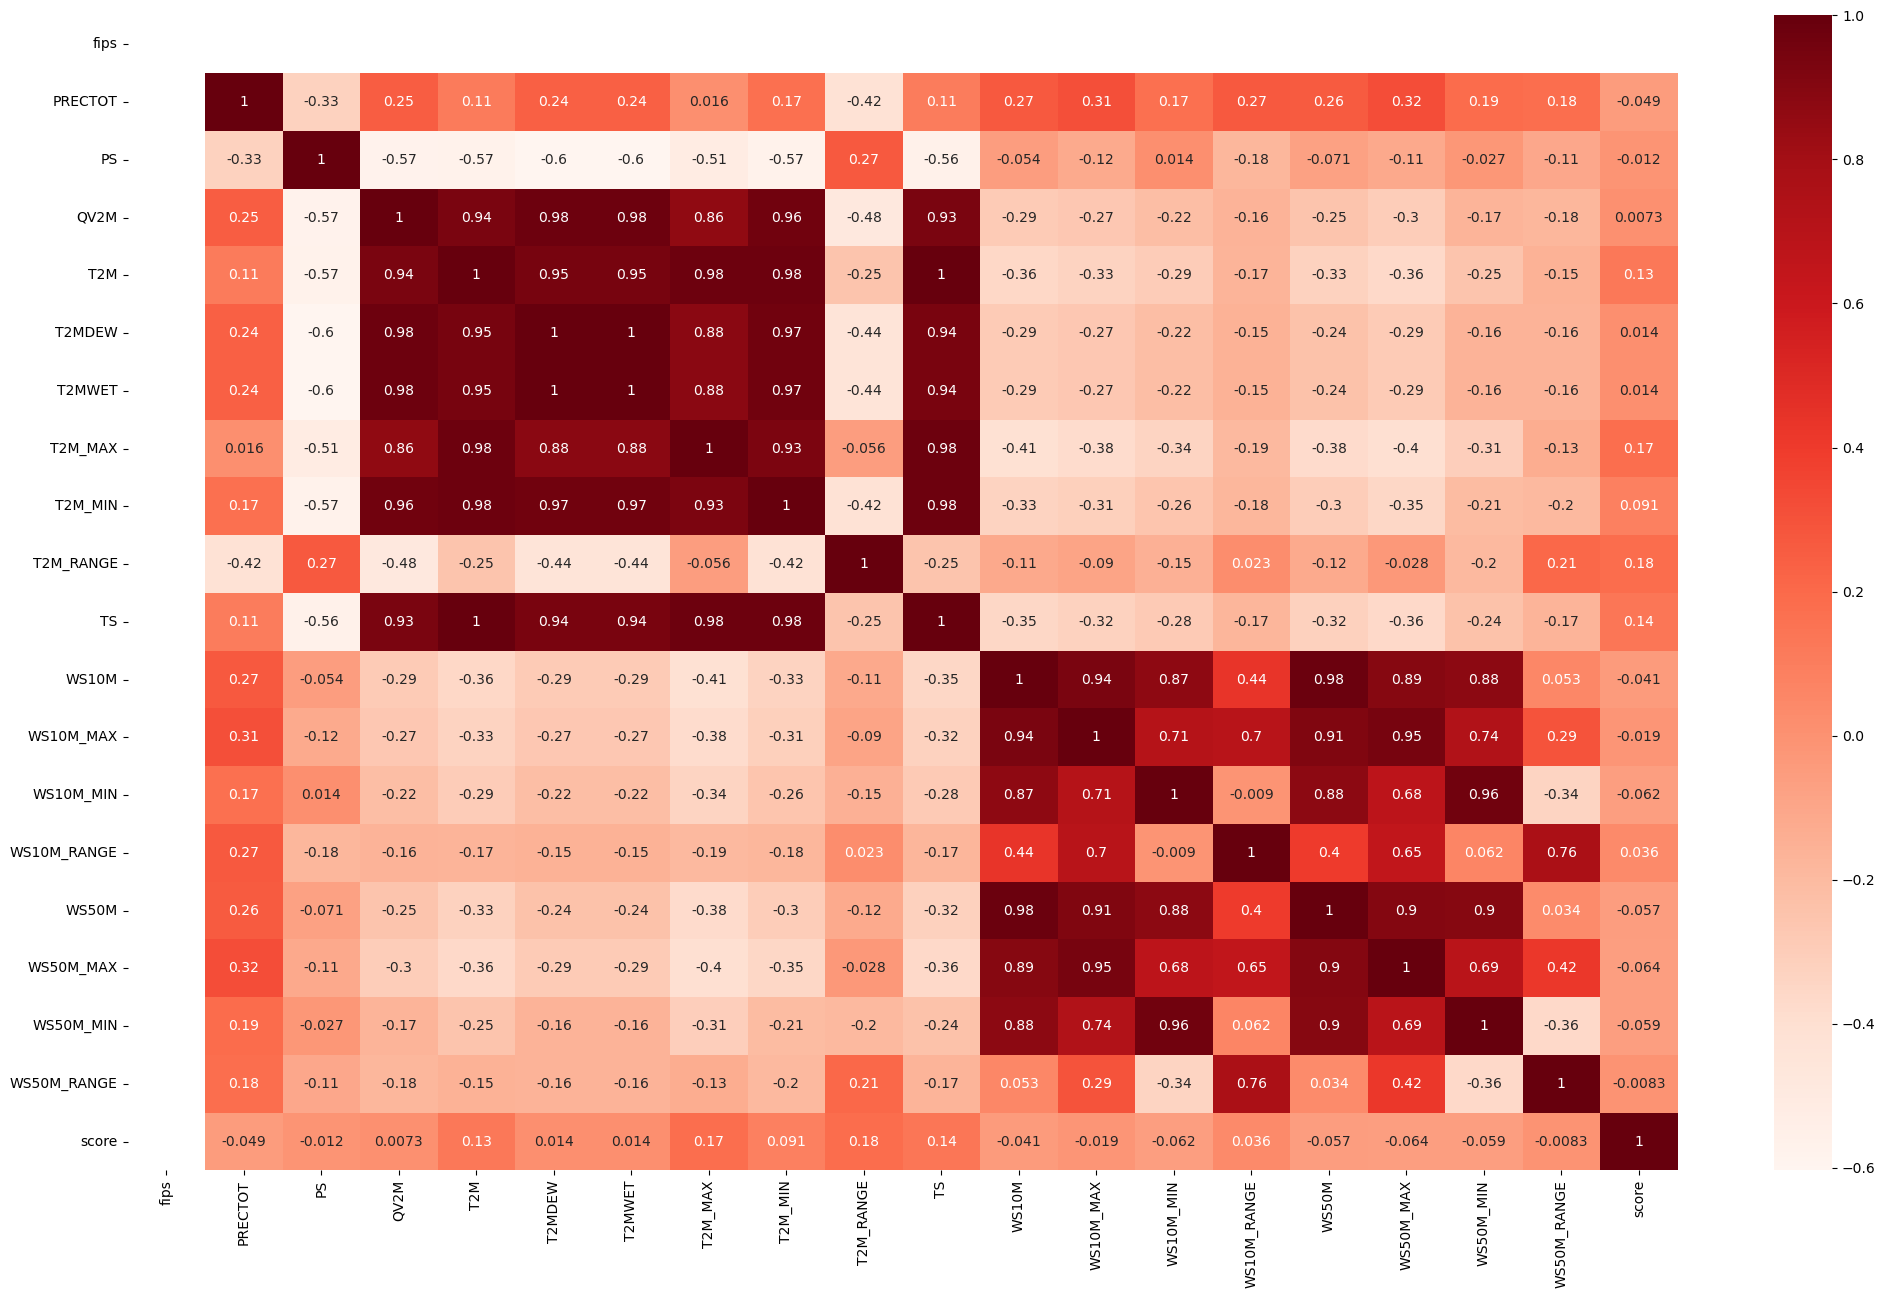

In [62]:
plt.figure(figsize=(25,15))
train_corr= train_timeseries_1003.corr()
sns.heatmap(train_corr, annot=True, cmap=plt.cm.Reds)
plt.show()

# Linear regression

In [63]:
y = train_timeseries_1003['score']

In [64]:
feature = train_timeseries_1003[['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE']]

In [65]:
X_train, X_valid, y_train, y_valid = train_test_split(feature, y, test_size =0.1, random_state=10)

In [66]:

"""X_train = train_timeseries_1003[['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE']]
y = train_timeseries_1003['score']
X_valid = validation_timeseries_1003[['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE']]
y_valid = validation_timeseries_1003['score']"""

"X_train = train_timeseries_1003[['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',\n       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',\n       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',\n       'WS50M_RANGE']]\ny = train_timeseries_1003['score']\nX_valid = validation_timeseries_1003[['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',\n       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',\n       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',\n       'WS50M_RANGE']]\ny_valid = validation_timeseries_1003['score']"

In [67]:

#cearting a linear regression
model = LinearRegression()

In [68]:
#fit the model 
model.fit(X_train, y_train)

LinearRegression()

In [69]:
pred_y = model.predict(X_valid)

In [70]:
mse = mean_squared_error(y_valid, pred_y)
rmse = mean_squared_error(y_valid, pred_y, squared=False)
r2 = r2_score(y_valid, pred_y)
mse,rmse,r2

(1.1459154891621377, 1.0704744224698401, 0.15706306714662632)

In [71]:
y_valid, pred_y

(date
 2013-07-26    0.000000
 2010-05-05    0.000000
 2009-07-07    0.660600
 2015-05-22    0.000000
 2006-11-05    1.000000
                 ...   
 2009-07-11    0.660600
 2009-11-12    0.000000
 2013-08-18    0.000000
 2002-06-02    2.999571
 2005-07-11    0.000000
 Name: score, Length: 621, dtype: float64,
 array([ 9.39536944e-01,  7.30445518e-01,  7.86285463e-01,  1.41333468e+00,
         1.03849780e+00,  3.72284142e-01,  4.65911553e-01,  8.06813452e-01,
         6.88776536e-01,  8.85507192e-01,  1.16114077e-01,  1.44229735e+00,
         6.07734245e-01,  8.89449291e-01,  6.58783326e-01,  1.37606866e+00,
         1.49108009e+00,  8.51236494e-01,  1.17112307e+00,  8.52523224e-01,
         1.07665182e+00,  8.68547830e-01,  6.24238488e-01,  7.24781332e-02,
         2.24514608e+00,  5.00334341e-01,  9.65652041e-01,  2.12912177e-01,
         2.83713818e-01,  5.50433419e-01,  5.79608531e-01,  2.24922917e-01,
         1.33774219e+00,  6.69735105e-01,  7.35213013e-01,  1.18368506e+00,
   

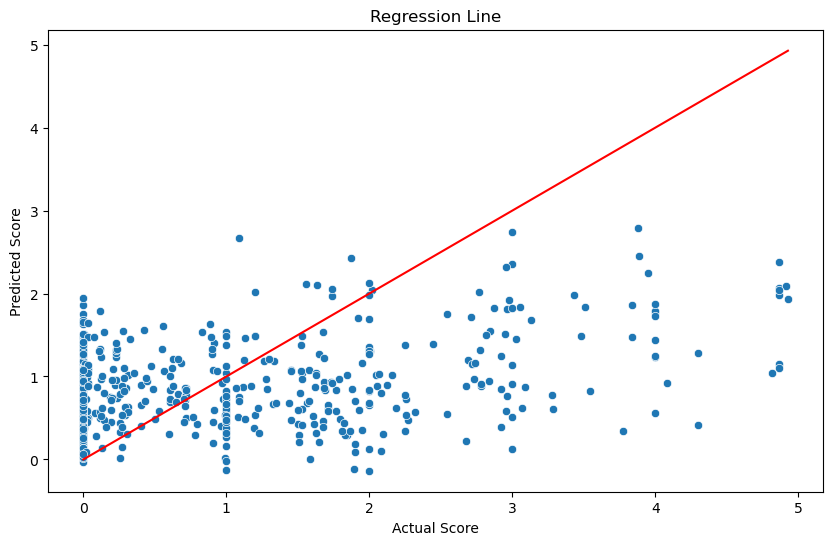

In [77]:

#creating the scatter plot of the actual data points
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_valid, y=pred_y)

#Add label and title
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Regression Line')

#plot regression line
plt.plot([y_valid.min(), y_valid.max()],[y_valid.min(),y_valid.max()], color = 'red')
plt.show()

In [82]:
new_valid_y = np.array(np.array(y_valid)).astype(int)
new_pred_y = np.array(np.array(pred_y)).astype(int)
accuracy = accuracy_score(new_valid_y, new_pred_y)
accuracy

0.5539452495974235

# Ridge 

In [83]:
predictors = train_timeseries_1003.columns[~train_timeseries_1003.columns.isin(["score", "fips"])]

In [84]:
predictors

Index(['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX',
       'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN',
       'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE'],
      dtype='object')

In [85]:
rr = Ridge(alpha = .1)

In [86]:
predictors = train_timeseries_1003.columns[~train_timeseries_1003.columns.isin(["score", "fips"])]
def forecast(train_timeseries_1003, model,predictors, start=5589, step=90):
    all_predictions = []
    for i in range(start, train_timeseries_1003.shape[0], step):
        train = train_timeseries_1003.iloc[:i,:]
        test = train_timeseries_1003.iloc[i:(i+step),:]
        model.fit(train[predictors], train["score"])
        preds = model.predict(test[predictors])
        
        preds = pd.Series(preds, index = test.index)
        combined = pd.concat([test['score'], preds], axis = 1)
        combined.columns = ["actual", "predictions"]

        all_predictions.append(combined)
    return pd.concat(all_predictions)
forecast = forecast(train_timeseries_1003, rr, predictors)

In [87]:
forecast

actual  predictions
date                           
2015-04-21  0.1197     1.394563
2015-04-22  0.1197     0.890423
2015-04-23  0.1197     0.856552
2015-04-24  0.1197     0.672330
2015-04-25  0.1197     0.401616
...            ...          ...
2016-12-27  1.6452     0.140901
2016-12-28  1.6452     0.164488
2016-12-29  1.6452     1.035414
2016-12-30  1.6452     0.823292
2016-12-31  1.6452     1.195236

[621 rows x 2 columns]

In [88]:
mean_squared_error(forecast["actual"], forecast["predictions"])

0.7162736898048186

In [89]:
mae_r = mean_absolute_error(forecast["actual"], forecast["predictions"])
mse_r = mean_squared_error(forecast["actual"], forecast["predictions"])
rmse_r = np.sqrt(mse_r)
r2_r = r2_score(forecast["actual"], forecast["predictions"])
mae_r, mse_r, rmse_r, r2_r


(0.7052654187439764,
 0.7162736898048186,
 0.8463295397212711,
 0.03853225652801284)

In [93]:
new_valid_y = np.array(np.array(forecast["actual"])).astype(int)
new_pred_y = np.array(np.array(forecast["predictions"])).astype(int)
accuracy_r = accuracy_score(new_valid_y, new_pred_y)
accuracy_r

0.6376811594202898

### As above plot shows that data is categerical data. linear regression is not suitable for this dataset

In [ ]:
# concatneting training data and valdation data to perform pca
#new_df = pd.concat([train_timeseries_1003,validation_timeseries_1003], axis = 0 )

# Random forrest

In [94]:
y = train_timeseries_1003['score']
feature_set = train_timeseries_1003[['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',]]


In [95]:
train_x1, valid_x1, train_y1, valid_y1 = train_test_split(feature_set, y, test_size =0.1, random_state=1)

In [96]:
rf_1 = RandomForestRegressor(n_estimators = 100, random_state = 42)


In [97]:
def forecast(train_timeseries_1003, rf_1,predictors, start=4968, step=90):
    all_predictions_1 = []
    for i in range(start, train_timeseries_1003.shape[0], step):
        train = train_timeseries_1003.iloc[:i,:]
        test = train_timeseries_1003.iloc[i:(i+step),:]
        rf_1.fit(train[predictors], train["score"])
        #feature_importances = rf_1.feature_importances_
        #select feature
        #feature_importance_df = pd.DataFrame({'Feature': train.columns, 'Importance': feature_importances})
        #sort the feature in order
        #feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending = False)
        #preds = model.predict(test[predictors])
        prediction_1= rf_1.predict(test[predictors])
        prediction_1 = pd.Series(prediction_1, index = test.index)
        combined_1 = pd.concat([test['score'], prediction_1], axis = 1)
        combined_1.columns = ["actual", "predictions"]

        all_predictions_1.append(combined_1)
    return pd.concat(all_predictions_1)

In [98]:
forecast_1 = forecast(train_timeseries_1003, rf_1, predictors)

In [99]:
forecast_1


actual  predictions
date                           
2013-08-08  0.0000     0.753965
2013-08-09  0.0000     0.685016
2013-08-10  0.0000     0.561154
2013-08-11  0.0000     0.405418
2013-08-12  0.0000     0.490584
...            ...          ...
2016-12-27  1.6452     0.866379
2016-12-28  1.6452     0.528882
2016-12-29  1.6452     0.942107
2016-12-30  1.6452     0.916670
2016-12-31  1.6452     0.878676

[1242 rows x 2 columns]

In [100]:
mae_1 = mean_absolute_error(forecast_1["actual"], forecast_1["predictions"])
mse_1 = mean_squared_error(forecast_1["actual"], forecast_1["predictions"])
rmse_1 = np.sqrt(mse_1)
r2_1= r2_score(forecast_1["actual"], forecast_1["predictions"])
mae_1, mse_1, rmse_1, r2_1


(0.6883490893719807,
 0.6779469095079347,
 0.8233753150950875,
 -0.04132667087031505)

In [106]:
new_valid_y = np.array(np.array(forecast_1["actual"])).astype(int)
new_pred_y = np.array(np.array(forecast_1["predictions"])).astype(int)
accuracy_rf = accuracy_score(new_valid_y, new_pred_y)
accuracy_rf

0.6336553945249598

In [101]:
rf_1.fit(train_x1, train_y1)
feature_importances = rf_1.feature_importances_
#select feature
feature_importance_df = pd.DataFrame({'Feature': train_x1.columns, 'Importance': feature_importances})
#sort the feature in order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending = False)

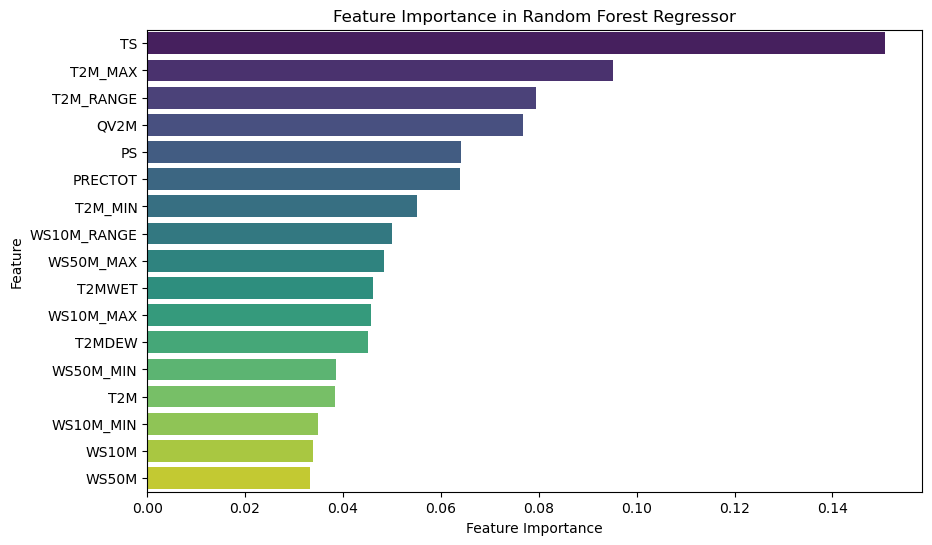

In [102]:
# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Regressor')

# Show the plot
plt.show()

In [103]:
prediction_1= rf_1.predict(valid_x1)
prediction_1

array([0.33152657, 0.71416857, 1.23108643, 1.06303886, 0.603788  ,
       0.88377714, 0.69687486, 0.31133043, 0.30122886, 1.38141814,
       1.38194343, 0.69704443, 3.37107686, 1.70665414, 0.53157557,
       0.54073843, 0.48306314, 0.53147043, 4.69488157, 0.60889929,
       0.68444786, 0.46393029, 0.84613329, 0.39555114, 3.84490129,
       0.26182086, 0.60464257, 0.99391786, 0.29387271, 0.56954857,
       1.02289943, 1.05767286, 0.71739243, 0.39650771, 0.13158757,
       1.81334886, 1.60780529, 0.67831257, 0.50508757, 1.15434514,
       1.06739114, 1.27317557, 0.554171  , 0.65678314, 0.80480543,
       0.70398271, 0.32385357, 0.66634943, 0.25866871, 1.31674386,
       0.60115471, 0.67190929, 0.56244686, 1.03225529, 3.04656843,
       0.62345643, 0.75519457, 0.43042243, 1.068354  , 1.98859029,
       0.89979571, 0.66658629, 1.05376743, 2.05977457, 0.148822  ,
       1.47186743, 0.91974543, 0.61874514, 0.31064643, 0.746285  ,
       0.508761  , 1.81575957, 0.80037543, 1.28207471, 0.95770

In [104]:
mae = mean_absolute_error(valid_y1, prediction_1)
mse = mean_squared_error(valid_y1, prediction_1)
rmse = np.sqrt(mse)
r2 = r2_score(valid_y1, prediction_1)
mae, mse, rmse, r2

(0.7556723071083506,
 0.9994137551536648,
 0.9997068346038577,
 0.3569817571417635)

In [105]:
new_valid_y1 = np.array(np.array(valid_y1)).astype(int)
new_prediction1 = np.array(np.array(prediction_1)).astype(int)
confusion_matrix1 = metrics.confusion_matrix(new_valid_y1, new_prediction1)
confusion_matrix1

array([[346,  57,   1,   1,   0,   0],
       [ 72,  30,   3,   1,   0,   0],
       [ 20,  28,   8,   3,   0,   0],
       [  4,   6,   8,   6,   0,   0],
       [  8,   7,   3,   3,   4,   0],
       [  0,   1,   1,   0,   0,   0]], dtype=int64)

In [107]:
new_valid_y = np.array(np.array(valid_y1)).astype(int)
new_pred_y = np.array(np.array(prediction_1)).astype(int)
accuracy_rf1 = accuracy_score(new_valid_y, new_pred_y)
accuracy_rf1

0.6344605475040258

# PCA implementation

In [108]:
#dropping fips becuase we are considering one area at a time, it has no correlation for this subdataset.
"""new_df_wfs= new_df.drop(['fips','score'], axis = 1)
target = new_df['score'].copy()
test_df_wfs= test_timeseries_1003_w.drop(['fips','score'], axis = 1)
target_1 = test_timeseries_1003_w['score']

new_df_wfs= new_df.drop(['fips','score'], axis = 1)
target = new_df['score'].copy()
test_df_wfs= test_timeseries_1003.drop(['fips','score'], axis = 1)
target_1 = test_timeseries_1003['score']
"""
new_df_wfs= train_timeseries_1003.drop(['fips','score'], axis = 1)
target = train_timeseries_1003['score'].copy()
target_subset = target.iloc[:4968]

In [109]:
new_df_wfs

PRECTOT      PS   QV2M    T2M  T2MDEW  T2MWET  T2M_MAX  T2M_MIN  \
date                                                                          
2000-01-01     0.11  101.58  11.26  16.97   16.05   16.05    21.81    14.16   
2000-01-02     0.96  101.62  12.34  18.66   17.50   17.50    22.72    15.54   
2000-01-03     3.03  101.26  13.42  20.05   18.79   18.79    22.88    18.53   
2000-01-04     3.12  101.52   7.58  13.74    8.77    8.78    19.61     5.36   
2000-01-05     0.00  102.25   3.69   6.16   -0.26   -0.21    11.39     1.29   
...             ...     ...    ...    ...     ...     ...      ...      ...   
2016-12-27     0.59  101.85  13.12  19.69   18.48   18.49    24.41    16.32   
2016-12-28     0.95  101.52  13.45  19.90   18.84   18.84    23.85    17.45   
2016-12-29     1.23  101.70   8.69  15.27   10.44   10.45    20.11     6.70   
2016-12-30     0.00  102.24   3.96   7.81    0.74    0.78    11.73     4.36   
2016-12-31    59.20  101.46   8.25  12.86   10.43   10.44    18.38     6.24   

            T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANGE  WS50M  \
date                                                                            
2000-01-01       7.65  16.79   2.32       3.16       1.84         1.33   4.52   
2000-01-02       7.18  18.47   2.91       3.57       2.18         1.39   5.59   
2000-01-03       4.35  19.75   4.56       5.67       3.60         2.06   7.79   
2000-01-04      14.25  14.19   5.04       6.23       3.59         2.65   7.76   
2000-01-05      10.09   7.00   2.54       4.18       0.92         3.26   3.74   
...               ...    ...    ...        ...        ...          ...    ...   
2016-12-27       8.09  19.40   1.61       2.02       1.16         0.86   3.24   
2016-12-28       6.41  19.62   1.98       2.71       1.20         1.50   3.72   
2016-12-29      13.41  15.39   4.60       6.92       2.60         4.32   7.67   
2016-12-30       7.38   8.06   2.51       3.87       0.92         2.95   3.87   
2016-12-31      12.13  12.83   3.31       6.03       2.05         3.98   5.58   

            WS50M_MAX  WS50M_MIN  WS50M_RANGE  
date                                           
2000-01-01       5.49       3.07         2.43  
2000-01-02       6.76       4.59         2.17  
2000-01-03       9.01       6.93         2.08  
2000-01-04       9.29       5.17         4.12  
2000-01-05       6.60       1.28         5.32  
...               ...        ...          ...  
2016-12-27       4.62       1.73         2.89  
2016-12-28       5.39       2.34         3.04  
2016-12-29       9.96       5.44         4.52  
2016-12-30       6.83       1.10         5.74  
2016-12-31      10.12       3.37         6.75  

[6210 rows x 18 columns]

In [110]:
new_df_wfs.dtypes

PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
dtype: object

In [111]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(new_df_wfs), index= new_df_wfs.index, columns = new_df_wfs.columns)

In [112]:
from sklearn.decomposition import PCA
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index = X.columns, columns = ['V1', 'V2', 'V3', 'V4','V5', 'V6', 'V7', 'V8','V9', 'V10', 'V11', 'V12','V13', 'V14', 'V14', 'V16','V17', 'V18'])
pca_loadings

V1        V2        V3        V4        V5        V6  \
PRECTOT     -0.008835  0.241625  0.155591  0.567338  0.635189  0.416710   
PS           0.156553 -0.253761 -0.165744  0.037189 -0.431279  0.832477   
QV2M        -0.304492  0.194702 -0.011951  0.058169 -0.109173  0.075409   
T2M         -0.317405  0.150950  0.015609 -0.170062 -0.010822  0.110247   
T2MDEW      -0.305709  0.197953 -0.000599  0.010257 -0.066797  0.051429   
T2MWET      -0.305745  0.197993 -0.000666  0.010382 -0.067243  0.051910   
T2M_MAX     -0.311612  0.103727  0.028760 -0.309031  0.076279  0.164945   
T2M_MIN     -0.315360  0.172701 -0.016399 -0.033038 -0.119870  0.062796   
T2M_RANGE    0.086780 -0.212938  0.115658 -0.674110  0.514322  0.237046   
TS          -0.315617  0.152276  0.006133 -0.175084 -0.016832  0.110304   
WS10M        0.230843  0.326621 -0.056022 -0.104038 -0.041672  0.035015   
WS10M_MAX    0.222390  0.325487  0.130862 -0.095031 -0.123695  0.032980   
WS10M_MIN    0.191243  0.289050 -0.332049 -0.095422  0.090556  0.027893   
WS10M_RANGE  0.121079  0.167723  0.526435 -0.037650 -0.268881  0.018483   
WS50M        0.220334  0.336567 -0.074055 -0.115133 -0.036846  0.037654   
WS50M_MAX    0.227687  0.305297  0.172179 -0.103660 -0.031403  0.051563   
WS50M_MIN    0.179936  0.313429 -0.319499 -0.087112  0.019654  0.008798   
WS50M_RANGE  0.067595 -0.000005  0.623346 -0.024268 -0.065206  0.055314   

                   V7        V8        V9       V10       V11       V12  \
PRECTOT     -0.122484  0.043346 -0.000204 -0.034605 -0.009717  0.012693   
PS           0.040012 -0.020614  0.009246 -0.004793 -0.027376 -0.014658   
QV2M         0.098858 -0.263181 -0.091396  0.398870  0.757623  0.139336   
T2M         -0.056005  0.209956  0.035026 -0.101421 -0.044427 -0.091687   
T2MDEW       0.143312 -0.444845 -0.040431  0.019428 -0.356002 -0.113758   
T2MWET       0.142780 -0.442907 -0.040222  0.020626 -0.347334 -0.110081   
T2M_MAX     -0.068492  0.238618  0.047775 -0.110327 -0.039707  0.141196   
T2M_MIN     -0.041873  0.316444  0.056147 -0.135915 -0.055636  0.130774   
T2M_RANGE   -0.055489 -0.270145 -0.034444  0.096602  0.053116 -0.006320   
TS          -0.091086  0.310074  0.012202 -0.021762  0.090465 -0.123123   
WS10M       -0.062826  0.162792 -0.589294  0.120434  0.033596 -0.626190   
WS10M_MAX   -0.246141  0.024304  0.197417  0.381659 -0.171859  0.167391   
WS10M_MIN    0.213311  0.195420  0.189218  0.530506 -0.234780  0.191336   
WS10M_RANGE -0.569236 -0.165360  0.087095  0.000879 -0.004824  0.042759   
WS50M        0.096071 -0.087651 -0.507368 -0.381846  0.000589  0.607985   
WS50M_MAX    0.371746 -0.032381  0.369054 -0.279691  0.178519 -0.179933   
WS50M_MIN   -0.072311 -0.175458  0.395739 -0.342919  0.204310 -0.184152   
WS50M_RANGE  0.570110  0.178761 -0.021202  0.070074 -0.026718 -0.001080   

                  V13       V14       V14       V16       V17           V18  
PRECTOT      0.001826 -0.002964  0.000052  0.000032 -0.000030 -2.137021e-06  
PS          -0.011114 -0.000429  0.000018  0.000046 -0.000174 -5.610642e-06  
QV2M         0.066871  0.062054 -0.000144  0.000103 -0.005149 -3.399530e-07  
T2M         -0.360108  0.797644 -0.000984 -0.000382 -0.002369 -1.942748e-05  
T2MDEW       0.001106 -0.068017  0.004203  0.000601 -0.703833 -1.474041e-03  
T2MWET       0.000110 -0.063844 -0.004028 -0.000597  0.710313  1.468688e-03  
T2M_MAX      0.486788 -0.081790 -0.000276 -0.003905 -0.001176  6.492457e-01  
T2M_MIN      0.439108 -0.071019  0.000300  0.004105  0.001598 -7.137634e-01  
T2M_RANGE    0.010055 -0.009167  0.000142  0.001582  0.000701 -2.626458e-01  
TS          -0.606257 -0.581463  0.000874  0.000488  0.000578 -1.518780e-05  
WS10M        0.193453  0.014720  0.000021 -0.000192  0.001231 -1.040944e-05  
WS10M_MAX   -0.026740  0.012502  0.705532  0.005004  0.004155  3.370343e-04  
WS10M_MIN   -0.039488  0.018064 -0.506920 -0.003598 -0.002749 -2.502717e-04  
WS10M_RANGE  0.001895 -0.003365 -0.495147 -0.003524 -0.003021 -2.411658e-04

In [113]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12','PC13', 'PC14', 'PC15', 'PC16','PC17', 'PC18'], index=X.index)
df_plot.head()

PC1       PC2       PC3       PC4       PC5       PC6  \
date                                                                     
2000-01-01  0.159632 -0.621623 -1.252140  0.572188 -0.503303 -0.160049   
2000-01-02  0.488585  0.811198 -1.683095  0.268730 -0.696032  0.134428   
2000-01-03  1.861950  4.461114 -2.010438  0.036764 -1.216974 -0.213124   
2000-01-04  4.846781  2.372499  0.012659 -1.920222  0.426610  0.576708   
2000-01-05  4.411844 -3.093319  1.988695  0.853115 -1.023066  0.353179   

                 PC7       PC8       PC9      PC10      PC11      PC12  \
date                                                                     
2000-01-01  0.271204 -0.313288  0.056502 -0.136030 -0.195390  0.188300   
2000-01-02  0.389397 -0.408311  0.130333 -0.535858  0.026060  0.039758   
2000-01-03  0.298779 -0.053446  0.172438 -0.377582 -0.035700 -0.010565   
2000-01-04  0.348442 -0.082113 -0.400339  0.440676 -0.050072 -0.066193   
2000-01-05 -0.245829  0.310922  0.179536  0.119150  0.182880 -0.011527   

                PC13      PC14      PC15      PC16      PC17      PC18  
date                                                                    
2000-01-01  0.052291 -0.010547 -0.005618  0.003686  0.000731  0.000033  
2000-01-02  0.006495 -0.009362 -0.000266  0.000100  0.000285  0.000023  
2000-01-03  0.085344  0.025434  0.005188  0.000014  0.000202  0.000039  
2000-01-04 -0.095986  0.043561 -0.005319 -0.000036 -0.000259 -0.000016  
2000-01-05 -0.009607  0.027289  0.000049 -0.000047 -0.000200  0.000894

In [114]:
df_plot.describe()

PC1           PC2           PC3           PC4           PC5  \
count  6.210000e+03  6.210000e+03  6.210000e+03  6.210000e+03  6.210000e+03   
mean   4.576765e-18  5.492118e-17 -3.546993e-17 -1.830706e-17 -4.576765e-18   
std    2.898179e+00  2.186234e+00  1.513148e+00  1.062931e+00  7.344812e-01   
min   -5.637726e+00 -6.129269e+00 -3.831165e+00 -3.250608e+00 -2.973355e+00   
25%   -2.551045e+00 -1.403574e+00 -1.078985e+00 -6.969773e-01 -4.508982e-01   
50%   -1.846207e-01 -1.623335e-01 -2.368035e-01 -9.283178e-02 -3.997121e-02   
75%    2.175183e+00  1.177649e+00  8.676283e-01  5.944426e-01  3.935671e-01   
max    9.846878e+00  2.042617e+01  1.422340e+01  9.354327e+00  8.595993e+00   

                PC6           PC7           PC8           PC9          PC10  \
count  6.210000e+03  6.210000e+03  6.210000e+03  6.210000e+03  6.210000e+03   
mean   2.402802e-17  2.288382e-17 -1.201401e-17 -7.437243e-18  1.258610e-17   
std    6.809393e-01  4.464024e-01  2.938349e-01  2.082596e-01  1.950873e-01   
min   -2.901910e+00 -1.407150e+00 -1.345372e+00 -1.408164e+00 -7.822465e-01   
25%   -4.100852e-01 -3.336704e-01 -1.718234e-01 -1.078619e-01 -1.226209e-01   
50%    1.923268e-02 -6.434753e-03 -7.168009e-03 -6.511422e-04  5.014414e-03   
75%    4.344200e-01  3.207911e-01  1.622054e-01  1.042446e-01  1.273280e-01   
max    4.996510e+00  1.470525e+00  1.921602e+00  2.316768e+00  9.331562e-01   

               PC11          PC12          PC13          PC14          PC15  \
count  6.210000e+03  6.210000e+03  6.210000e+03  6.210000e+03  6.210000e+03   
mean   4.977232e-17  2.359894e-17  1.144191e-18  2.967746e-17 -4.067242e-19   
std    1.474836e-01  8.575426e-02  6.452294e-02  3.048590e-02  2.743761e-03   
min   -4.089086e-01 -3.242147e-01 -2.734829e-01 -1.720893e-01 -5.896534e-03   
25%   -1.025512e-01 -5.753420e-02 -3.567190e-02 -1.711323e-02 -2.166435e-04   
50%   -1.261503e-02 -3.564024e-03  1.128130e-03 -1.010065e-03 -1.020903e-04   
75%    9.396761e-02  5.659126e-02  3.663487e-02  1.499649e-02  6.380140e-05   
max    7.994961e-01  3.562213e-01  6.935763e-01  2.100168e-01  5.922037e-03   

               PC16          PC17          PC18  
count  6.210000e+03  6.210000e+03  6.210000e+03  
mean   8.302090e-18 -9.332309e-18  3.114681e-18  
std    1.810726e-03  1.262499e-03  4.484417e-04  
min   -3.940675e-03 -3.363913e-03 -9.390897e-04  
25%   -5.017732e-05 -5.164608e-04 -8.108258e-06  
50%    2.109817e-05  1.141831e-05  6.597159e-06  
75%    8.078461e-05  4.751161e-04  1.982292e-05  
max    4.096011e-03  2.778900e-02  9.616703e-04

In [115]:
## Biplot with 2 Principle Components
### constructing a biplot of the first two principle components using loading vectors

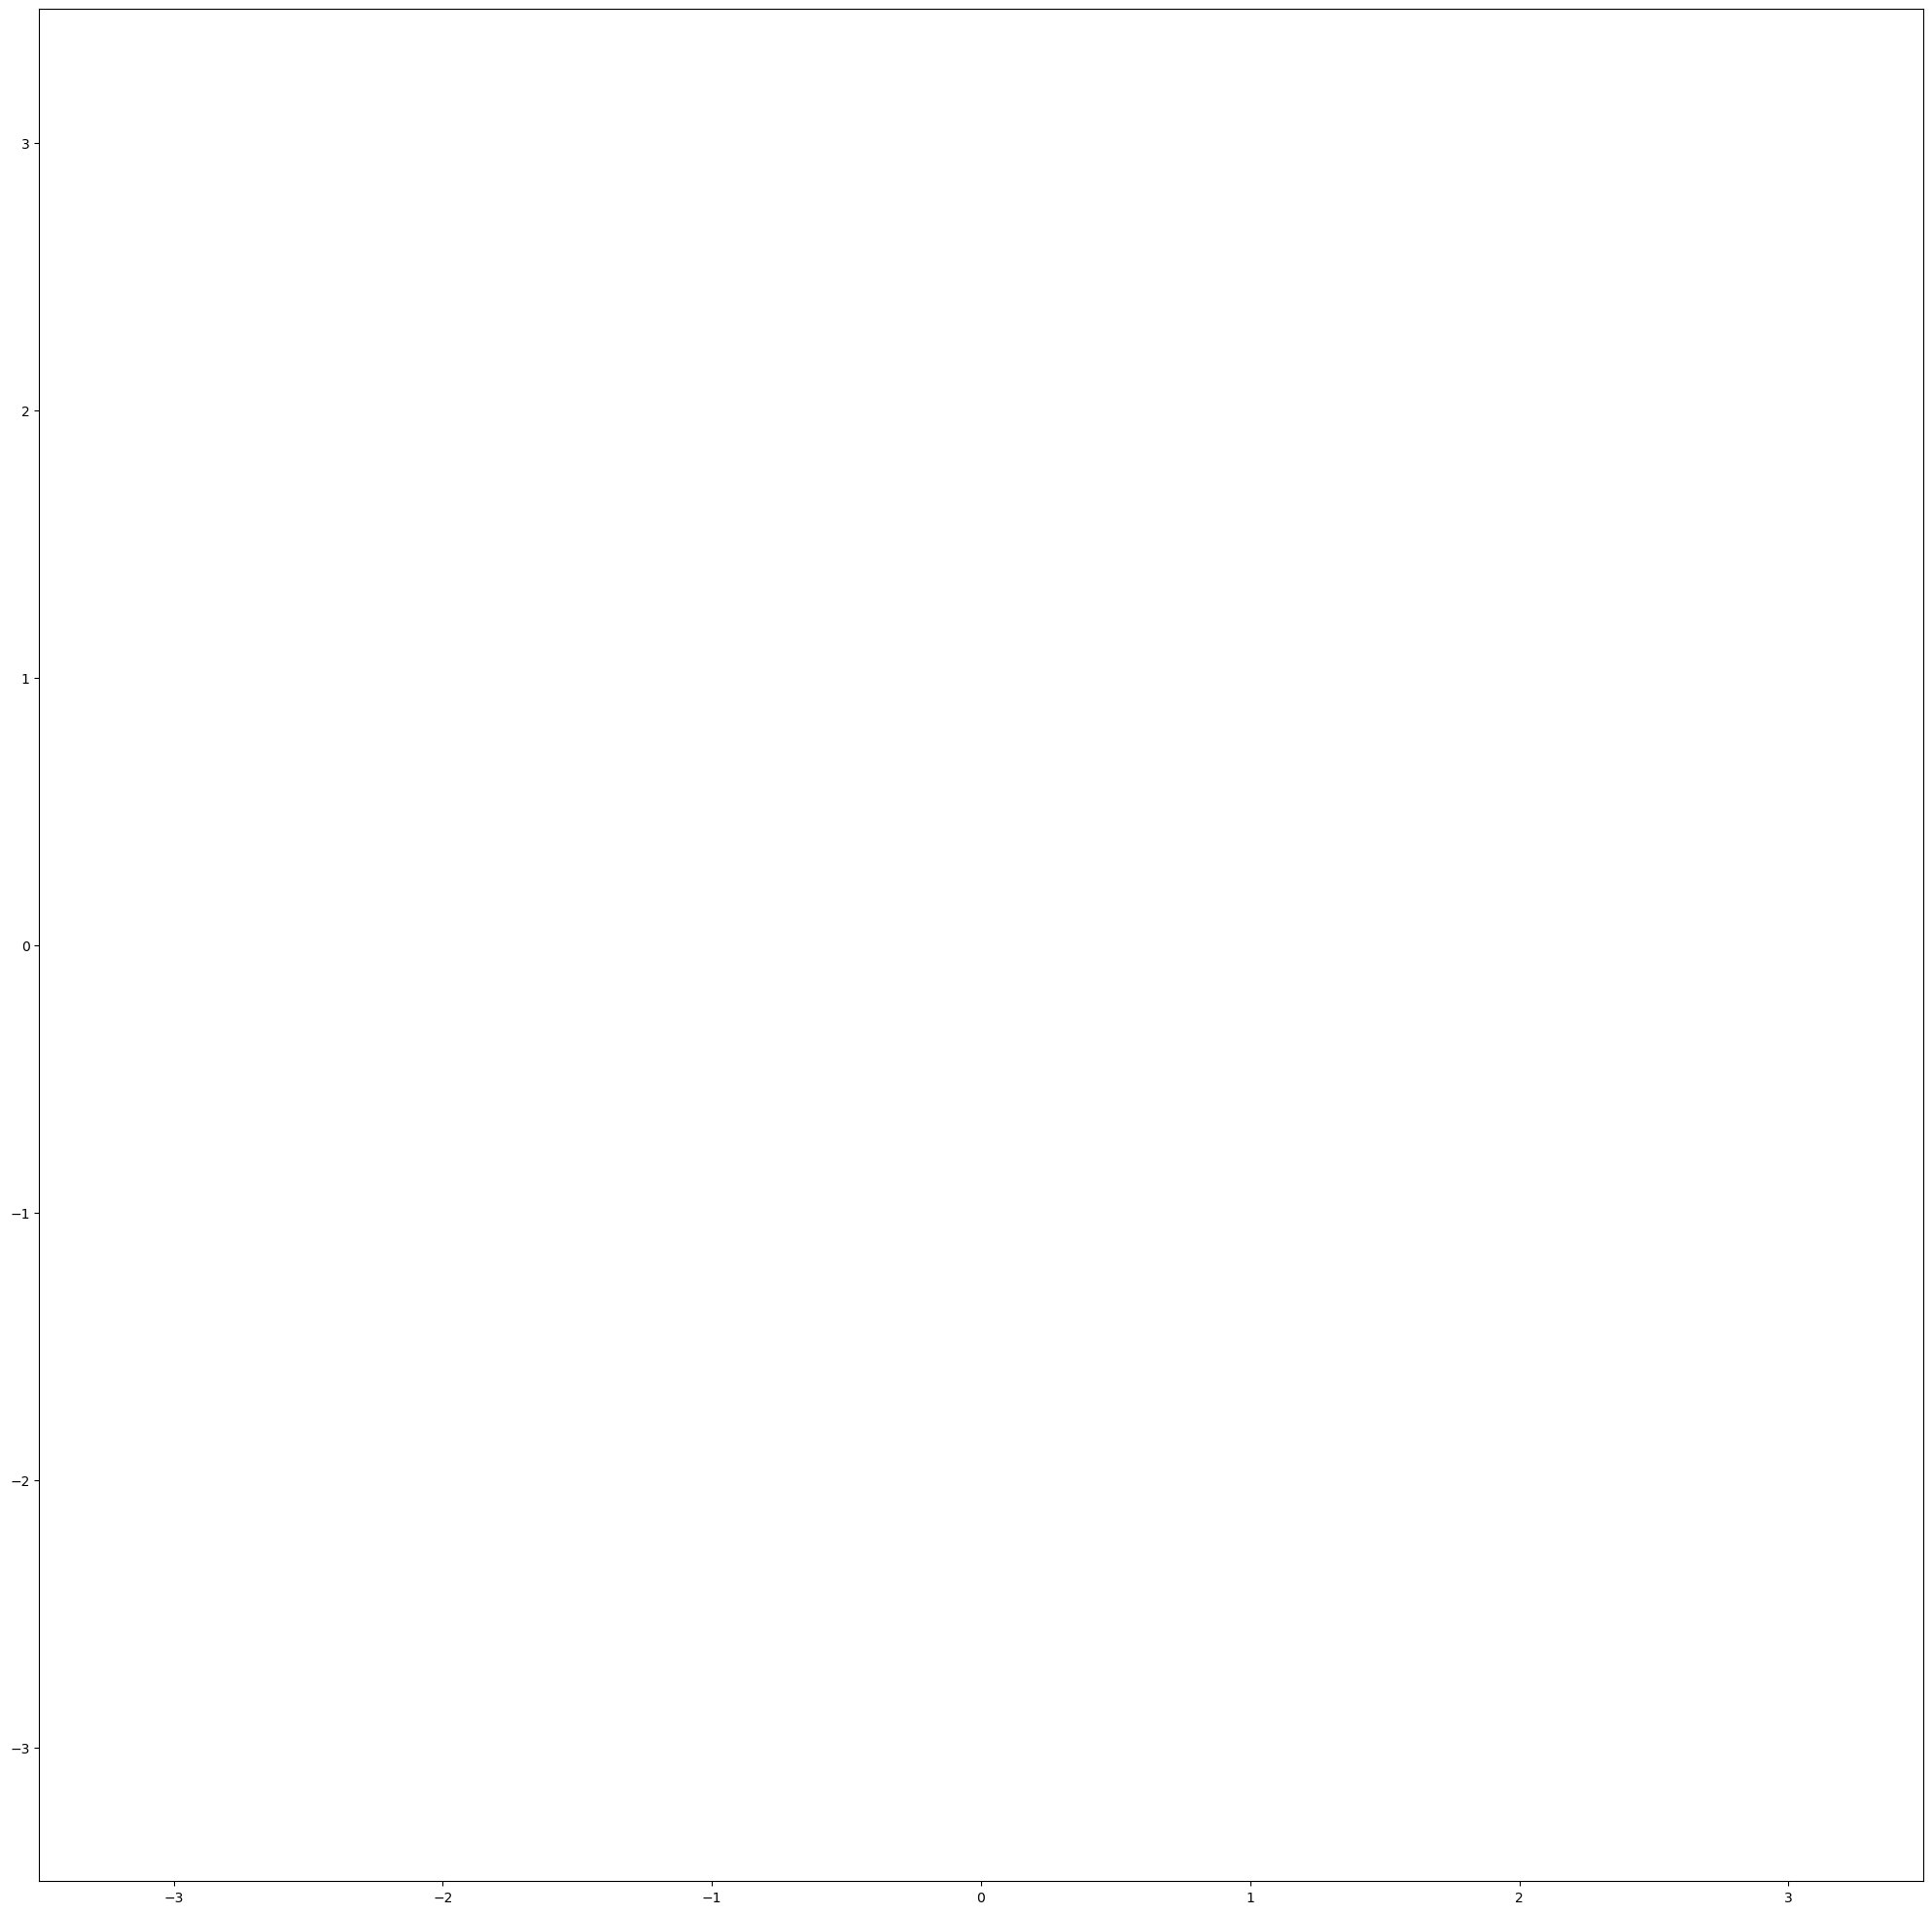

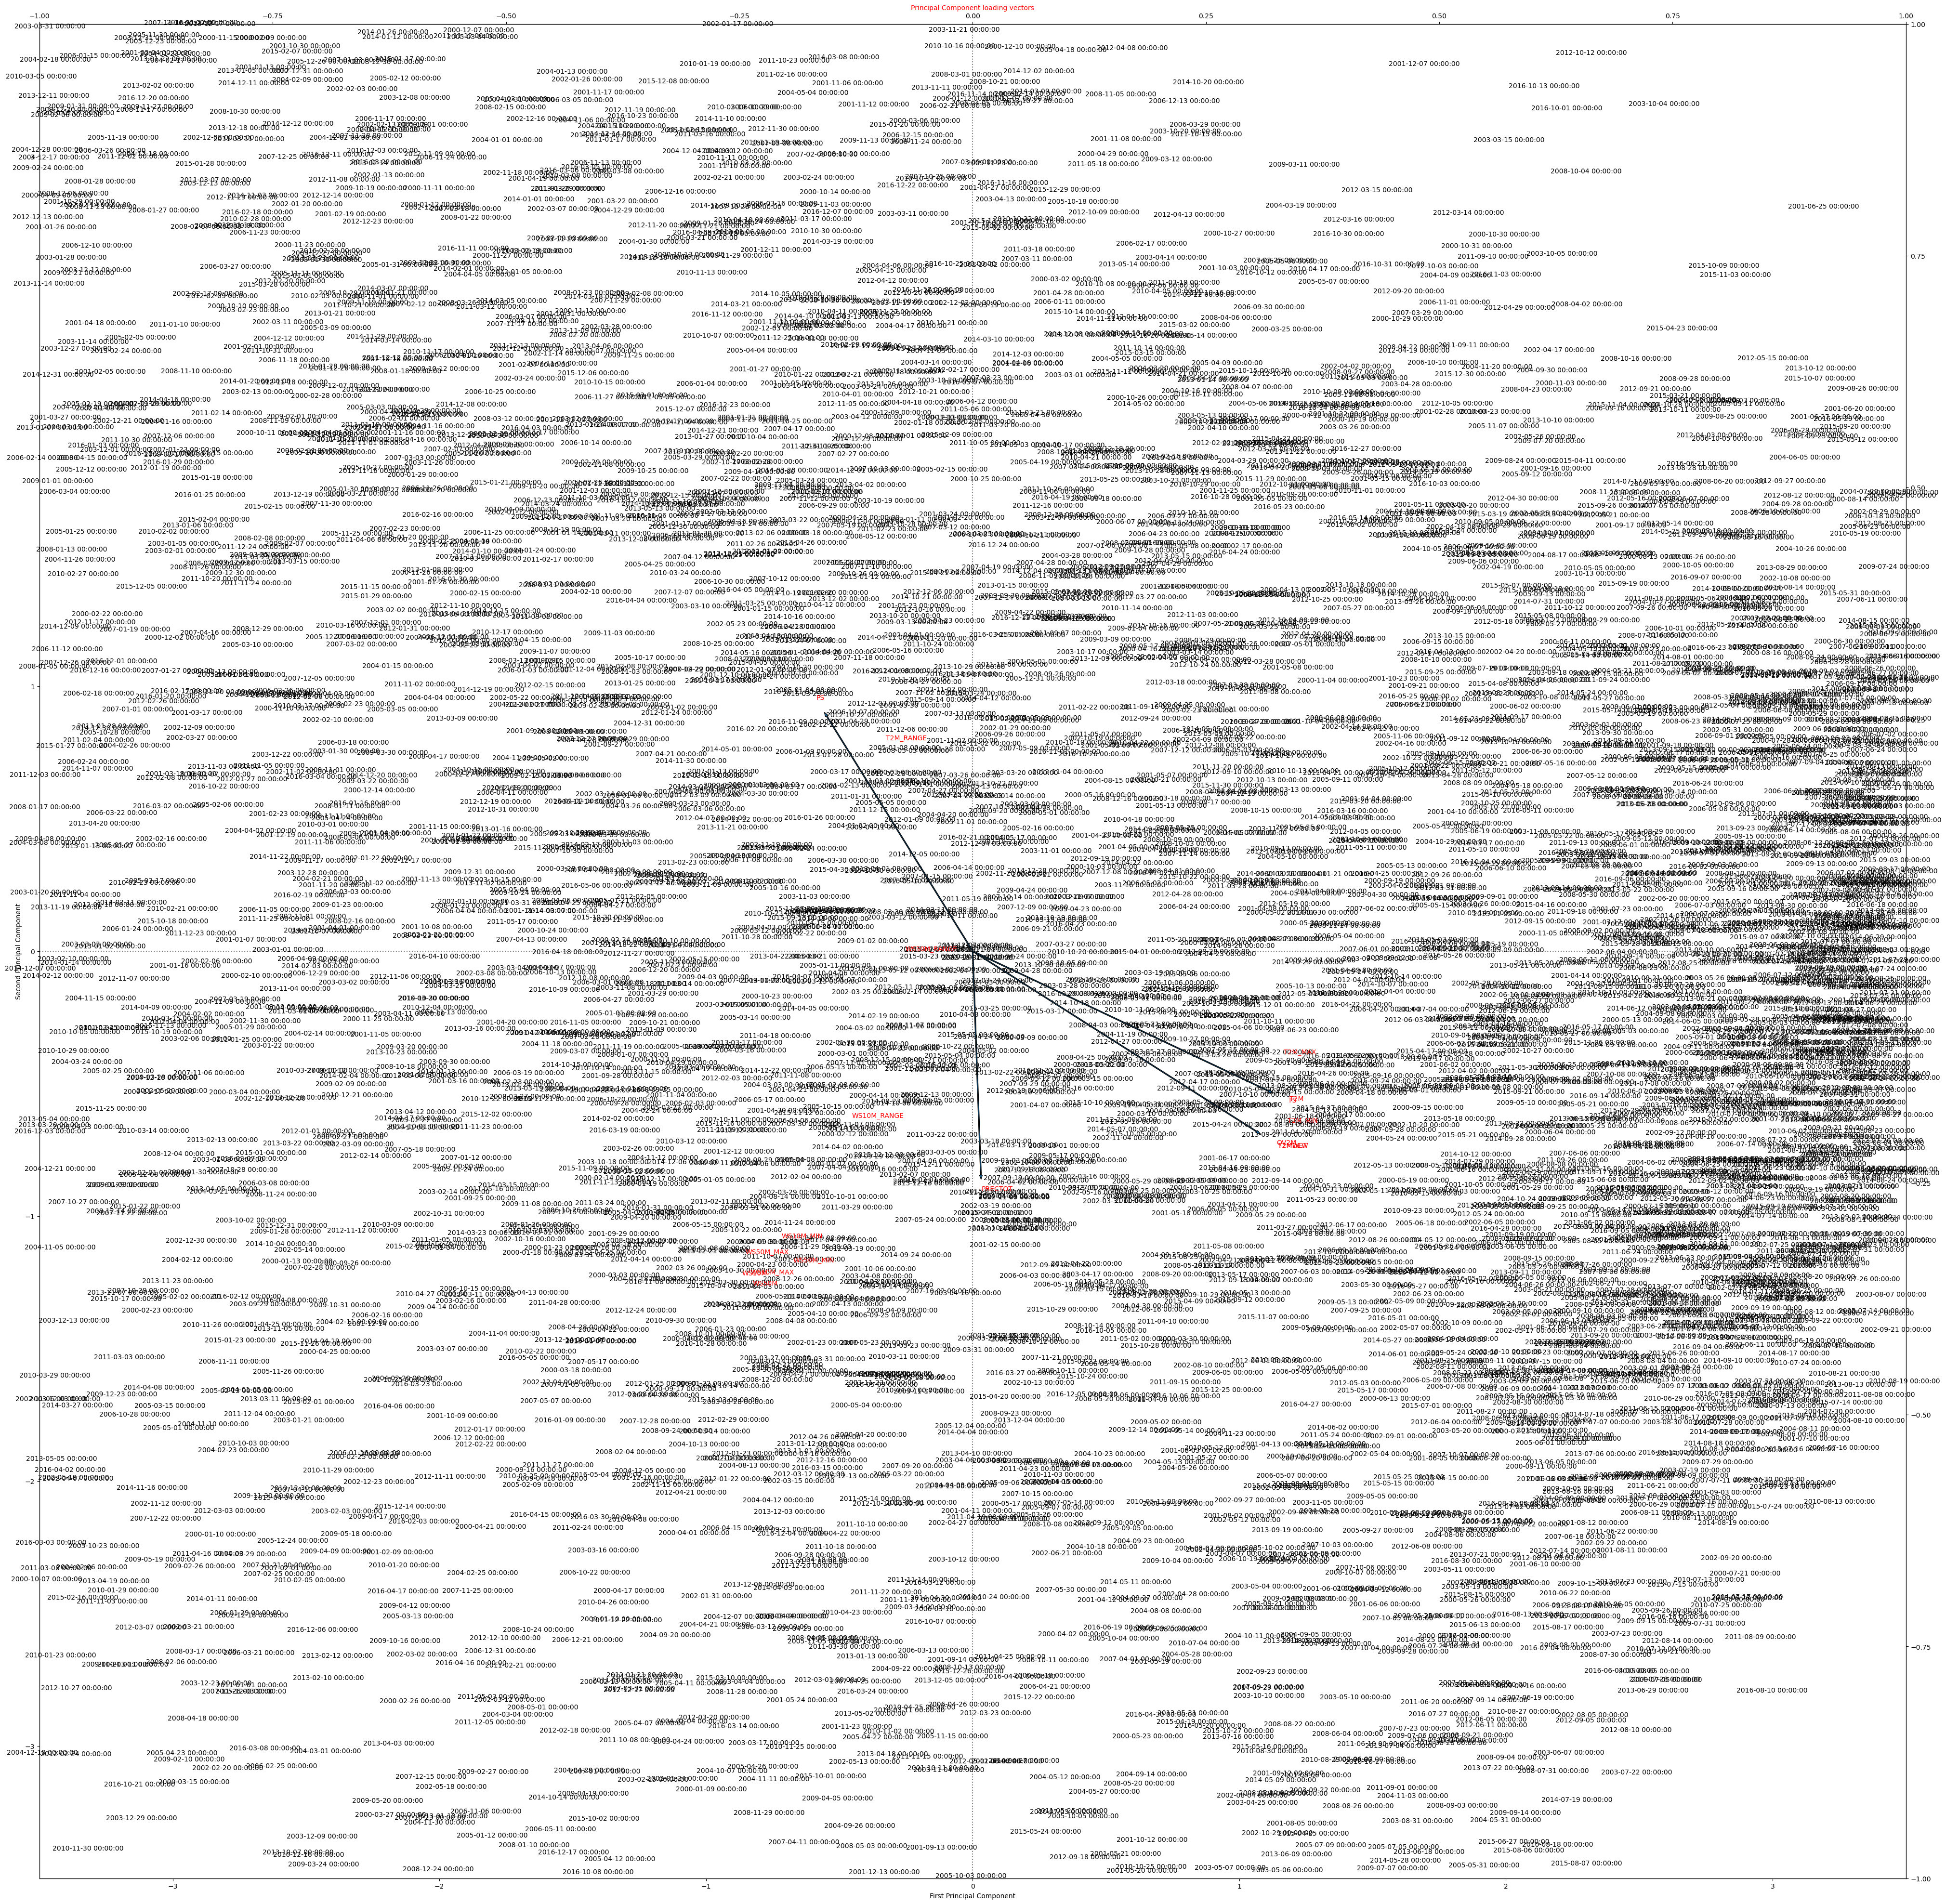

In [116]:
fig , ax1 = plt.subplots(figsize=(25,25))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
fig , ax1 = plt.subplots(figsize=(50,50))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')

# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])


In [117]:
pca_loadings.V1[1]

0.15655286178148226

In [118]:
pca_loadings[['V1', 'V2']]

V1        V2
PRECTOT     -0.008835  0.241625
PS           0.156553 -0.253761
QV2M        -0.304492  0.194702
T2M         -0.317405  0.150950
T2MDEW      -0.305709  0.197953
T2MWET      -0.305745  0.197993
T2M_MAX     -0.311612  0.103727
T2M_MIN     -0.315360  0.172701
T2M_RANGE    0.086780 -0.212938
TS          -0.315617  0.152276
WS10M        0.230843  0.326621
WS10M_MAX    0.222390  0.325487
WS10M_MIN    0.191243  0.289050
WS10M_RANGE  0.121079  0.167723
WS50M        0.220334  0.336567
WS50M_MAX    0.227687  0.305297
WS50M_MIN    0.179936  0.313429
WS50M_RANGE  0.067595 -0.000005

In [119]:
pca.explained_variance_

array([8.39944245e+00, 4.77962097e+00, 2.28961755e+00, 1.12982149e+00,
       5.39462704e-01, 4.63678364e-01, 1.99275064e-01, 8.63389285e-02,
       4.33720423e-02, 3.80590417e-02, 2.17514236e-02, 7.35379264e-03,
       4.16321011e-03, 9.29389851e-04, 7.52822315e-06, 3.27872739e-06,
       1.59390246e-06, 2.01099931e-07])

In [120]:
pca.explained_variance_ratio_

array([4.66560549e-01, 2.65491739e-01, 1.27180492e-01, 6.27577533e-02,
       2.99653241e-02, 2.57557610e-02, 1.10690541e-02, 4.79583474e-03,
       2.40916990e-03, 2.11405073e-03, 1.20821783e-03, 4.08478247e-04,
       2.31252206e-04, 5.16244550e-05, 4.18167271e-07, 1.82122190e-07,
       8.85358775e-08, 1.11704193e-08])

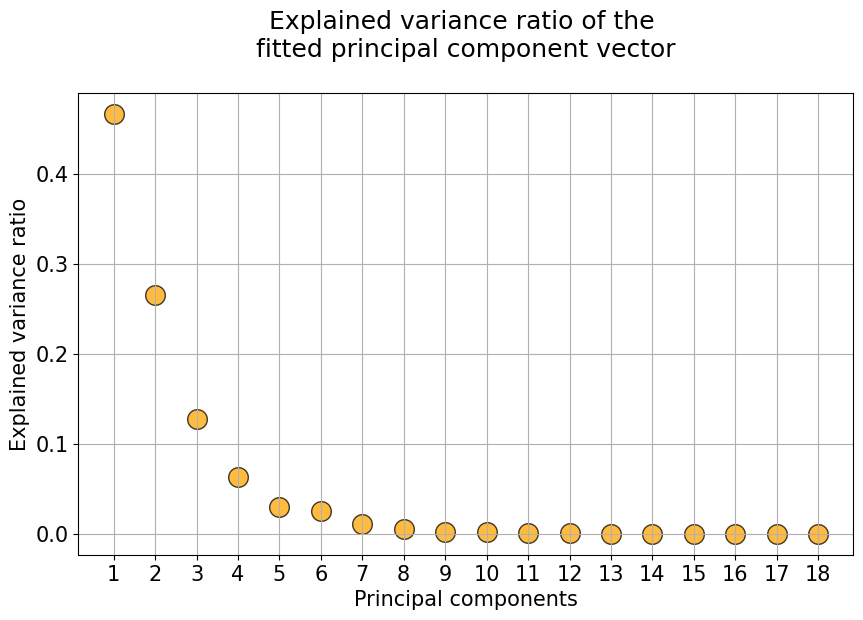

In [121]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=18)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

([<matplotlib.axis.XTick at 0x12339d23210>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11')])

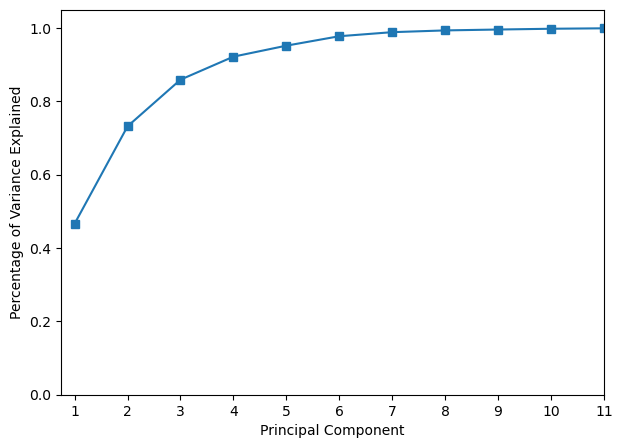

In [122]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11])


In [123]:
# For this we can install via !pip install pca
from pca import pca
# Initialize
df_plot = pca(n_components=4, normalize=True)
df_plot

In [124]:
out = df_plot.fit_transform(new_df_wfs)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [18] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


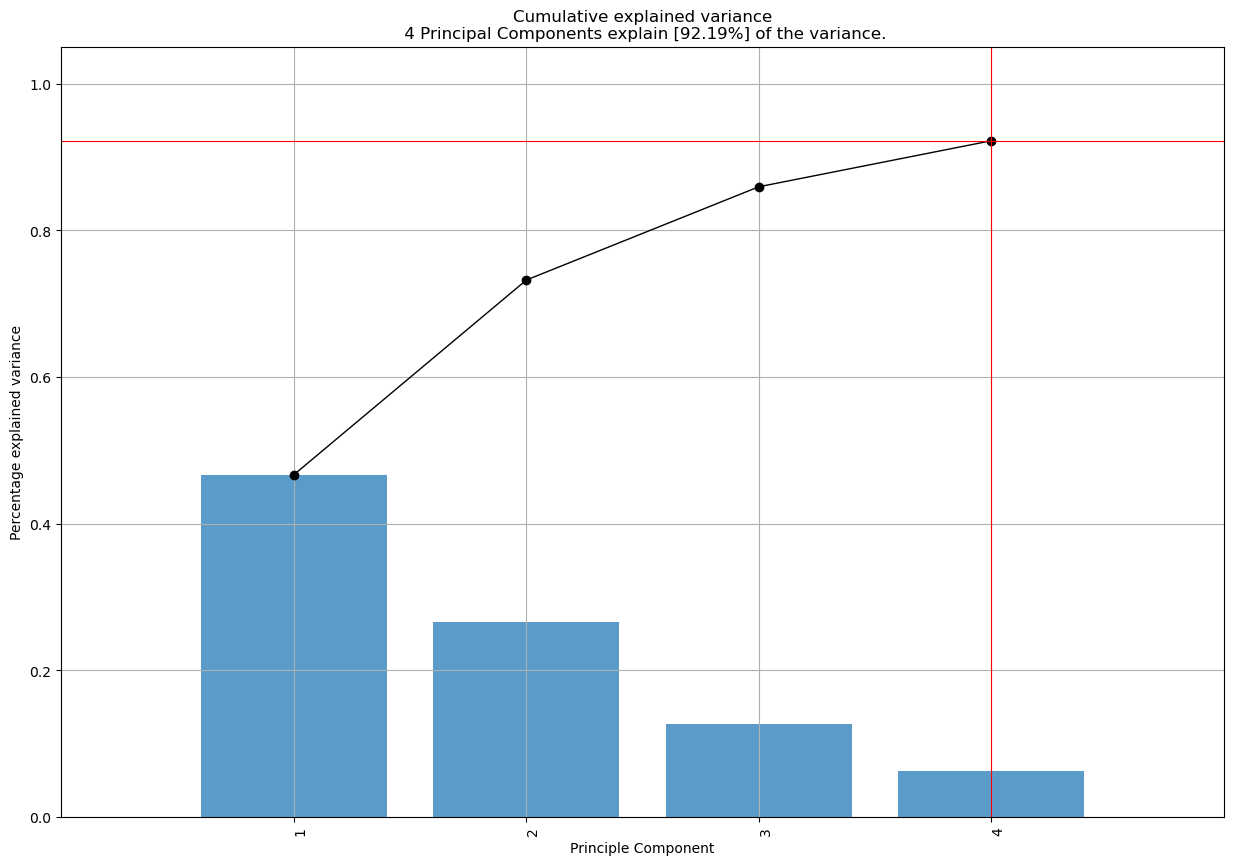

In [125]:
fig, ax = df_plot.plot()

In [126]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=4)
pca.fit(new_df_wfs)
pca.components_


array([[-9.91069842e-02,  1.54956197e-02, -2.52169747e-01,
        -3.92711822e-01, -3.93183758e-01, -3.92617039e-01,
        -3.67281804e-01, -4.23111690e-01,  5.58267160e-02,
        -3.78606906e-01,  1.75556988e-02,  2.10609725e-02,
         1.31241881e-02,  7.94644332e-03,  2.42921407e-02,
         3.05246081e-02,  1.91195448e-02,  1.14068466e-02],
       [ 9.54259453e-01, -1.18382652e-02,  3.72525613e-02,
        -8.28721521e-02,  4.30814705e-02,  4.30385838e-02,
        -1.67044979e-01, -2.75692356e-02, -1.39473397e-01,
        -8.48543335e-02,  4.25229906e-02,  6.06501604e-02,
         2.84465577e-02,  3.22113197e-02,  6.50951777e-02,
         8.20205539e-02,  5.33792385e-02,  2.86387648e-02],
       [ 2.56889942e-01,  7.75578541e-04, -2.04536247e-01,
         1.82617432e-01, -2.70277162e-01, -2.69841085e-01,
         4.81002333e-01, -1.25691561e-01,  6.06679003e-01,
         1.81140424e-01, -5.76709163e-02, -4.81427647e-02,
        -7.90957921e-02,  3.09650352e-02, -1.03442792e

In [127]:
ncomps = 4
column_names = []
for i in range(ncomps):
    column_names.append("PC"+str(i+1))

In [128]:
new_df_pca = pd.DataFrame(np.dot(new_df_wfs,np.transpose(pca.components_)),columns =column_names )

In [129]:
new_df_pca.shape

(6210, 4)

In [130]:
new_df_pca.head()

PC1       PC2        PC3        PC4
0 -39.978328 -5.864039   7.314995   9.831099
1 -43.603019 -4.986331   6.600850  12.115537
2 -47.349129 -2.084090   3.682613  16.339088
3 -26.080192 -2.499498  14.714342  17.389300
4  -7.848539 -4.045025  12.696155   8.406161

In [131]:
train_x, valid_x, train_y, valid_y = train_test_split(new_df_pca, target, test_size =0.4, random_state=1)

In [132]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)


In [133]:
"""def forecast(train_timeseries_1003, rf,target_subset, start=4968, step=90):
    all_predictions = []
    for i in range(start, train_timeseries_1003.shape[0], step):
        train = train_timeseries_1003.iloc[:i,:]
        test = train_timeseries_1003.iloc[i:(i+step),:]
        target_subset = target_subset[:i]
        rf.fit(train, target_subset)
        #feature_importances = rf_1.feature_importances_
        #select feature
        #feature_importance_df = pd.DataFrame({'Feature': train.columns, 'Importance': feature_importances})
        #sort the feature in order
        #feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending = False)
        #preds = model.predict(test[predictors])
        prediction= rf.predict(test)
        prediction = pd.Series(prediction, index = test.index)
        combined= pd.concat([target_subset, prediction], axis = 1)
        combined.columns = ["actual", "predictions"]

        all_predictions.append(combined)
    return pd.concat(all_predictions)
    forecast_1 = forecast(new_df_pca, rf, target_subset)
    """

'def forecast(train_timeseries_1003, rf,target_subset, start=4968, step=90):\n    all_predictions = []\n    for i in range(start, train_timeseries_1003.shape[0], step):\n        train = train_timeseries_1003.iloc[:i,:]\n        test = train_timeseries_1003.iloc[i:(i+step),:]\n        target_subset = target_subset[:i]\n        rf.fit(train, target_subset)\n        #feature_importances = rf_1.feature_importances_\n        #select feature\n        #feature_importance_df = pd.DataFrame({\'Feature\': train.columns, \'Importance\': feature_importances})\n        #sort the feature in order\n        #feature_importance_df = feature_importance_df.sort_values(by=\'Importance\', ascending = False)\n        #preds = model.predict(test[predictors])\n        prediction= rf.predict(test)\n        prediction = pd.Series(prediction, index = test.index)\n        combined= pd.concat([target_subset, prediction], axis = 1)\n        combined.columns = ["actual", "predictions"]\n\n        all_predictions.app

In [134]:
rf.fit(train_x, train_y)
feature_importances = rf.feature_importances_
#select feature
feature_importance_df = pd.DataFrame({'Feature': train_x.columns, 'Importance': feature_importances})
#sort the feature in order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending = False)

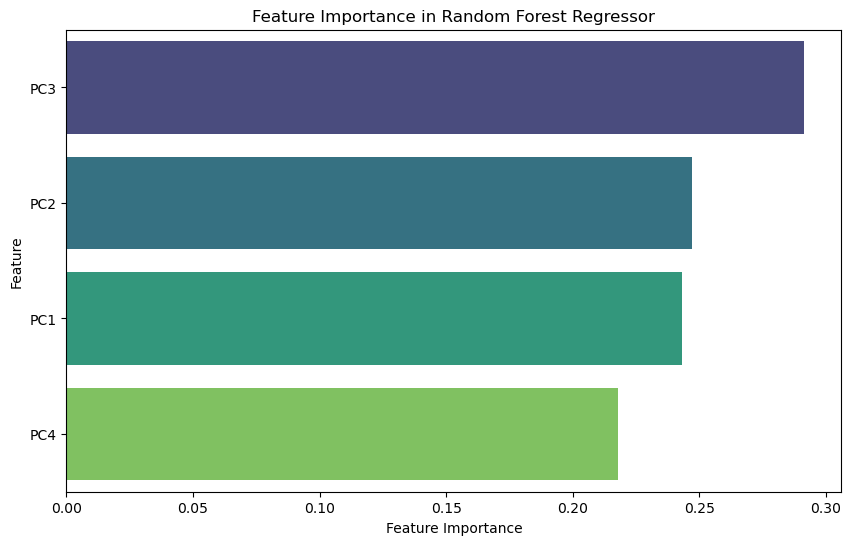

In [135]:
# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Regressor')

# Show the plot
plt.show()

In [136]:
prediction= rf.predict(valid_x)
prediction

array([0.590335  , 0.82807643, 1.11868457, ..., 0.75035629, 0.50374029,
       0.67790186])

In [137]:
#prediction_1= rf.predict(test_df_wfs)
#prediction_1

In [138]:
mae = mean_absolute_error(valid_y, prediction)
mse = mean_squared_error(valid_y, prediction)
rmse = np.sqrt(mse)
r2 = r2_score(valid_y, prediction)
mae, mse, rmse, r2


(0.8471436636185875,
 1.2081056044426604,
 1.099138573812538,
 0.17326359116363432)

In [145]:
new_valid_y = np.array(np.array(valid_y)).astype(int)
new_pred_y = np.array(np.array(prediction)).astype(int)
accuracy_rfp = accuracy_score(new_valid_y, new_pred_y)
accuracy_rfp

0.573268921095008

In [146]:
#confusion_matrix = metrics.confusion_matrix(valid_y, prediction)

In [147]:
prediction

array([0.590335  , 0.82807643, 1.11868457, ..., 0.75035629, 0.50374029,
       0.67790186])

In [148]:
model = LinearRegression()

In [149]:
#fit the model
model.fit(train_x, train_y)

LinearRegression()

In [150]:
y_pred= model.predict(valid_x)
y_pred

array([0.85976978, 0.41276748, 0.75588131, ..., 0.86360211, 0.81585675,
       0.2139823 ])

In [151]:
len(y_pred)

2484

In [152]:
mae = mean_absolute_error(valid_y, y_pred)
mse = mean_squared_error(valid_y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(valid_y, y_pred)
mae, mse, rmse, r2


(0.8873363682438881,
 1.2861952454699972,
 1.1341054825147425,
 0.11982492723156446)

In [153]:
new_valid_y = np.array(np.array(valid_y)).astype(int)

In [154]:
new_prediction = np.array(np.array(prediction)).astype(int)

In [155]:
confusion_matrix = metrics.confusion_matrix(new_valid_y, new_prediction)

In [156]:
confusion_matrix

array([[1269,  323,   35,    3,    0,    0],
       [ 280,  119,   24,    1,    0,    0],
       [ 142,   80,   31,    8,    0,    0],
       [  26,   29,   24,    4,    1,    0],
       [  30,   14,   21,   11,    1,    0],
       [   2,    3,    2,    1,    0,    0]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

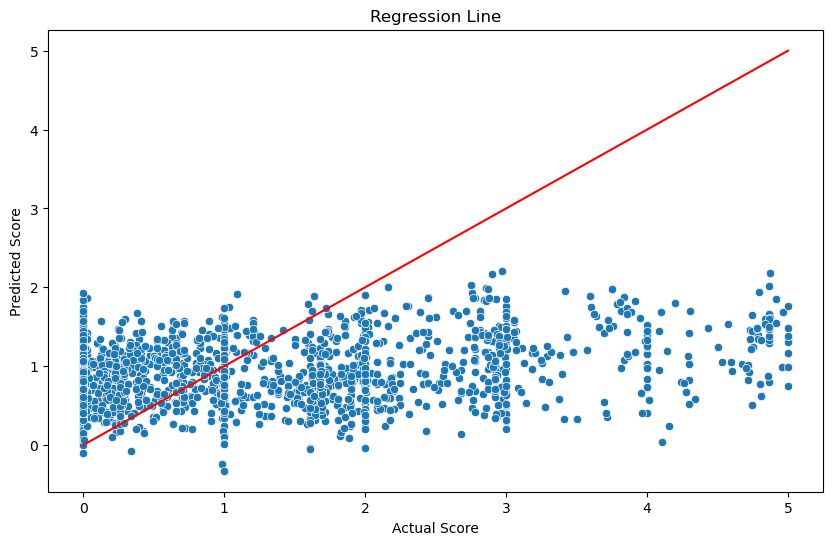

In [157]:
#creating the scatter plot of the actual data points
plt.figure(figsize=(10,6))
sns.scatterplot(x=valid_y, y=y_pred)

#Add label and title
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Regression Line')

#plot regression line
plt.plot([valid_y.min(), valid_y.max()],[valid_y.min(),valid_y.max()], color = 'red')
plt.show

In [158]:
"""

target = train_timeseries_1003.columns[~train_timeseries_1003.columns.isin(["PRECTOT","PS","QV2M","T2M", "fips", "T2MDEW", "T2MWET", "T2M_MAX",
"T2M_MIN", "T2M_RANGE", "TS", "WS10M", "WS10M_MAX", "WS10M_MIN", "WS10M_RANGE", "WS50M", "WS50M_MAX", "WS50M_MIN", "WS50M_RANGE"])]"""

'\n\ntarget = train_timeseries_1003.columns[~train_timeseries_1003.columns.isin(["PRECTOT","PS","QV2M","T2M", "fips", "T2MDEW", "T2MWET", "T2M_MAX",\n"T2M_MIN", "T2M_RANGE", "TS", "WS10M", "WS10M_MAX", "WS10M_MIN", "WS10M_RANGE", "WS50M", "WS50M_MAX", "WS50M_MIN", "WS50M_RANGE"])]'

In [159]:
"""new_index_values = range(len(target))
target_df = pd.DataFrame({'score': target, 'new_index': new_index_values})

target_df.set_index('new_index', inplace=True)
target_df"""

"new_index_values = range(len(target))\ntarget_df = pd.DataFrame({'score': target, 'new_index': new_index_values})\n\ntarget_df.set_index('new_index', inplace=True)\ntarget_df"

In [160]:
"""new_df_pca.shape, train_timeseries_1003.shape"""

'new_df_pca.shape, train_timeseries_1003.shape'

In [161]:
"""
def forecast(new_df_pca, model, target_df,start=4968, step=90):
    all_predictions = []
    for i in range(start, new_df_pca.shape[0], step):
        train = new_df_pca.iloc[:i,:]
        test = new_df_pca.iloc[i:(i+step),:]
        model.fit(new_df_pca, target_df)
        preds = model.predict(test)
        
        preds = pd.Series(preds, index = test.index)
        combined = pd.concat([target_df, preds], axis = 1)
        combined.columns = ["actual", "predictions"]

        all_predictions.append(combined)
    return pd.concat(all_predictions)"""

'\ndef forecast(new_df_pca, model, target_df,start=4968, step=90):\n    all_predictions = []\n    for i in range(start, new_df_pca.shape[0], step):\n        train = new_df_pca.iloc[:i,:]\n        test = new_df_pca.iloc[i:(i+step),:]\n        model.fit(new_df_pca, target_df)\n        preds = model.predict(test)\n        \n        preds = pd.Series(preds, index = test.index)\n        combined = pd.concat([target_df, preds], axis = 1)\n        combined.columns = ["actual", "predictions"]\n\n        all_predictions.append(combined)\n    return pd.concat(all_predictions)'

In [162]:
"""forecast = forecast(new_df_pca, rr, target_df)"""

'forecast = forecast(new_df_pca, rr, target_df)'

In [163]:
#mean_squared_error(forecast["actual"], forecast["predictions"])

## fips code 56021  with higher elevation


In [164]:
train_56021 = train_timeseries[train_timeseries['fips']==56021]
#validation_56021 = validation_timeseries[validation_timeseries['fips']==56021]

In [165]:
train_56021.shape

(6210, 21)

In [166]:
train_56021['date'] = pd.to_datetime(train_56021['date'])
train_56021.set_index('date', inplace = True)
train_56021_w=train_56021.resample('W').mean()

validation_56021['date'] = pd.to_datetime(validation_56021['date'])
validation_56021.set_index('date', inplace = True)
validation_56021_w = validation_56021.resample('W').mean()

C:\Users\softe\AppData\Local\Temp\ipykernel_23804\14107980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_56021['date'] = pd.to_datetime(train_56021['date'])


NameError: name 'validation_56021' is not defined

In [169]:
train_56021_w['score'] =train_56021_w['score'].interpolate(method = 'linear', limit_direction = 'both')
#validation_56021_w['score'] =validation_56021_w['score'].interpolate(method = 'linear', limit_direction = 'both')

In [170]:
train_56021_w.isnull().sum()

fips           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

In [171]:
#new_df_56021= pd.concat([train_56021_w,validation_56021_w], axis = 0 )

In [172]:
#dropping fips becuase we are considering one area at a time, it has no correlation for this subdataset.
new_df_56= train_56021_w.drop(['fips','score'], axis = 1)
target_56021 = train_56021_w['score'].copy()
#test_df_wfs= test_timeseries_1003_w.drop(['fips','score'], axis = 1)
#target_1 = test_timeseries_1003_w['score']

In [173]:
new_df_56.dtypes

PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
dtype: object

In [174]:
summary_56021 = train_56021.describe()
summary_56021

fips      PRECTOT           PS         QV2M          T2M  \
count   6210.0  6210.000000  6210.000000  6210.000000  6210.000000   
mean   56021.0     1.152797    81.775697     4.674551     8.690414   
std        0.0     2.650231     0.525612     2.528056    10.174931   
min    56021.0     0.000000    79.550000     0.380000   -22.860000   
25%    56021.0     0.030000    81.450000     2.710000     0.300000   
50%    56021.0     0.220000    81.850000     3.940000     8.130000   
75%    56021.0     1.040000    82.160000     6.370000    17.860000   
max    56021.0    39.540000    83.180000    13.590000    29.030000   

            T2MDEW       T2MWET      T2M_MAX      T2M_MIN    T2M_RANGE  \
count  6210.000000  6210.000000  6210.000000  6210.000000  6210.000000   
mean     -1.714646    -1.629559    15.898100     2.418876    13.479248   
std       7.260940     7.171741    11.402673     8.905891     4.022093   
min     -27.240000   -25.710000   -20.600000   -26.200000     1.720000   
25%      -7.130000    -7.020000     6.350000    -4.340000    10.400000   
50%      -2.410000    -2.360000    15.850000     1.560000    13.600000   
75%       4.180000     4.190000    25.965000    10.210000    16.690000   
max      15.690000    15.690000    38.000000    21.240000    25.550000   

                TS        WS10M    WS10M_MAX    WS10M_MIN  WS10M_RANGE  \
count  6210.000000  6210.000000  6210.000000  6210.000000  6210.000000   
mean      9.185866     5.169870     7.718206     2.499552     5.218591   
std      10.732152     2.116248     2.714313     1.838237     1.996555   
min     -21.180000     1.320000     2.360000     0.010000     0.830000   
25%       0.012500     3.610000     5.710000     1.080000     3.822500   
50%       8.535000     4.650000     7.150000     2.110000     4.900000   
75%      19.050000     6.350000     9.340000     3.410000     6.250000   
max      30.620000    15.040000    19.220000    10.820000    16.810000   

             WS50M    WS50M_MAX    WS50M_MIN  WS50M_RANGE       score  
count  6210.000000  6210.000000  6210.000000  6210.000000  887.000000  
mean      7.265254    10.464068     3.848108     6.615995    1.066536  
std       2.761685     3.042351     2.846523     2.314810    1.286390  
min       1.700000     2.980000     0.020000     0.990000    0.000000  
25%       5.210000     8.340000     1.490000     4.950000    0.000000  
50%       6.670000     9.920000     3.180000     6.390000    0.573700  
75%       8.940000    12.137500     5.610000     7.950000    1.936250  
max      19.760000    24.090000    14.110000    20.350000    5.000000

In [175]:
summary_56021.to_csv('summary_5602', sep = '\t')

In [176]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
X = pd.DataFrame(scale(new_df_56), index= new_df_56.index, columns = new_df_56.columns)
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index = X.columns, columns = ['V1', 'V2', 'V3', 'V4','V5', 'V6', 'V7', 'V8','V9', 'V10', 'V11', 'V12','V13', 'V14', 'V14', 'V16','V17', 'V18'])
pca_loadings

V1        V2        V3        V4        V5        V6  \
PRECTOT     -0.073465  0.028950 -0.089580  0.838239 -0.127773  0.493625   
PS          -0.174643  0.045948  0.257186 -0.248800 -0.884263  0.221248   
QV2M        -0.263706 -0.120156  0.154476  0.202767 -0.052675 -0.297681   
T2M         -0.268787 -0.209461  0.143352 -0.024583  0.101998 -0.006432   
T2MDEW      -0.269180 -0.146858  0.142741  0.173635 -0.014849 -0.198343   
T2MWET      -0.269317 -0.146922  0.142998  0.173074 -0.015456 -0.197817   
T2M_MAX     -0.267380 -0.215804  0.134301 -0.071547  0.114440  0.075534   
T2M_MIN     -0.267977 -0.193593  0.165959  0.015985  0.048551 -0.136045   
T2M_RANGE   -0.209527 -0.238763  0.009000 -0.325255  0.292703  0.709116   
TS          -0.269751 -0.206612  0.127623 -0.016871  0.116872  0.015926   
WS10M        0.262946 -0.189905  0.224210  0.068704 -0.005291  0.040714   
WS10M_MAX    0.258214 -0.282298  0.097551  0.072974 -0.028275 -0.000787   
WS10M_MIN    0.245005 -0.047438  0.404903  0.059908  0.048252  0.036173   
WS10M_RANGE  0.168554 -0.448108 -0.310140  0.058833 -0.108328 -0.044754   
WS50M        0.260757 -0.191207  0.250298  0.018254 -0.006063  0.024530   
WS50M_MAX    0.249820 -0.310790  0.137410 -0.002478 -0.051730 -0.001540   
WS50M_MIN    0.247062 -0.057362  0.402530  0.030997  0.068192  0.040000   
WS50M_RANGE  0.040712 -0.506549 -0.463860 -0.061531 -0.225995 -0.075960   

                   V7        V8        V9       V10       V11       V12  \
PRECTOT     -0.072522 -0.123724 -0.008583  0.012690  0.047214 -0.008274   
PS           0.085445 -0.016048  0.015653  0.013874 -0.011232  0.011206   
QV2M        -0.003882  0.490001  0.308613  0.015485  0.649556 -0.030605   
T2M          0.008145 -0.295841  0.085133 -0.013709  0.036860  0.079250   
T2MDEW       0.017513  0.280042 -0.304088 -0.011873 -0.405332  0.017285   
T2MWET       0.017565  0.282500 -0.280446 -0.013077 -0.369917  0.015223   
T2M_MAX     -0.000632 -0.248716 -0.015949  0.006915  0.074449 -0.225764   
T2M_MIN     -0.006749 -0.441752 -0.006995  0.003832  0.081281 -0.267982   
T2M_RANGE    0.018194  0.395979 -0.040118  0.014923  0.037713 -0.048905   
TS           0.047124 -0.254530  0.255813 -0.031516 -0.093473  0.434634   
WS10M        0.075273  0.065605  0.267862 -0.639015 -0.113853  0.400089   
WS10M_MAX    0.225330  0.050800  0.272934  0.238206 -0.179920 -0.224316   
WS10M_MIN   -0.229161  0.085810  0.443977  0.249144 -0.303151 -0.310384   
WS10M_RANGE  0.677483 -0.011971 -0.042914  0.127722  0.040466 -0.028695   
WS50M       -0.041382 -0.043917 -0.362890 -0.511174  0.198181 -0.441557   
WS50M_MAX   -0.281609 -0.033859 -0.267182  0.287068  0.166225  0.283979   
WS50M_MIN    0.013901 -0.046658 -0.325368  0.330229  0.206528  0.307896   
WS50M_RANGE -0.578791  0.018692  0.067673 -0.037450 -0.049902 -0.002979   

                  V13       V14       V14       V16       V17       V18  
PRECTOT     -0.001721 -0.000916 -0.000738  0.000018 -0.000065  0.000009  
PS          -0.014907 -0.000424 -0.000582 -0.000012 -0.000013  0.000001  
QV2M        -0.015777 -0.020917 -0.022631  0.000036 -0.000295  0.000033  
T2M         -0.308924  0.808711  0.012920 -0.000547  0.001432 -0.000547  
T2MDEW       0.016080  0.020838 -0.692244 -0.004164 -0.006624  0.000057  
T2MWET       0.013745 -0.005718  0.720981  0.004190  0.007044 -0.000110  
T2M_MAX      0.342776 -0.124550 -0.003442  0.003209  0.000063 -0.766991  
T2M_MIN      0.415048 -0.154504 -0.003652 -0.002455 -0.000537  0.610095  
T2M_RANGE    0.049172 -0.003080 -0.001271 -0.000770 -0.000032  0.198727  
TS          -0.493393 -0.528586 -0.011649  0.000318 -0.001059  0.000373  
WS10M        0.404632  0.106289  0.000948 -0.000511  0.000151 -0.000079  
WS10M_MAX   -0.052117  0.002540  0.004344 -0.753360 -0.020292 -0.003110  
WS10M_MIN   -0.069228  0.002741 -0.003408  0.504227  0.013555  0.002064  
WS10M_RANGE -0.009417  0.003190 -0.002743  0.421213  0.011445  0.001748  
WS50M       -0.431261 -0.122277 -0.002941  0.000523 -0.00

In [177]:
# Fit the PCA model and transform X to get the principal components
pca_56 = PCA()
df_plot_56021 = pd.DataFrame(pca_56.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12','PC13', 'PC14', 'PC15', 'PC16','PC17', 'PC18'], index=X.index)
df_plot_56021.head()

PC1       PC2       PC3       PC4       PC5       PC6  \
date                                                                     
2000-01-02  3.239146 -0.055948 -2.584553  0.350214  1.297673 -1.277408   
2000-01-09  6.716092  0.475441  3.707905  0.355396  0.266801 -0.245297   
2000-01-16  3.985363 -1.556036 -0.272820  0.085261 -1.047705 -0.675023   
2000-01-23  2.373289  0.958812  0.402821  0.311569 -0.282736 -0.990820   
2000-01-30  1.576342  2.842163 -2.105080 -0.199506 -0.845740 -1.058904   

                 PC7       PC8       PC9      PC10      PC11      PC12  \
date                                                                     
2000-01-02  0.659211 -0.345759 -0.036937  0.761968  0.074921 -0.167567   
2000-01-09 -0.055658 -0.357278  0.360399  0.025634 -0.004585  0.072455   
2000-01-16 -0.414607 -0.218756 -0.403266 -0.258230  0.144793  0.071047   
2000-01-23 -0.033437 -0.155075 -0.284889  0.175806 -0.074430 -0.015357   
2000-01-30  0.493429 -0.395485  0.094644 -0.307312 -0.042675  0.061632   

                PC13      PC14      PC15      PC16      PC17      PC18  
date                                                                    
2000-01-02 -0.005234 -0.009025 -0.001224  0.000212 -0.001635  0.000021  
2000-01-09  0.011441 -0.002107  0.002991  0.000347  0.000387  0.000102  
2000-01-16 -0.107966  0.001494 -0.000923 -0.000473 -0.000108 -0.000009  
2000-01-23 -0.062071 -0.003617  0.002769  0.000700 -0.000985 -0.000006  
2000-01-30 -0.005003  0.007403 -0.001550  0.001181  0.000548  0.000002

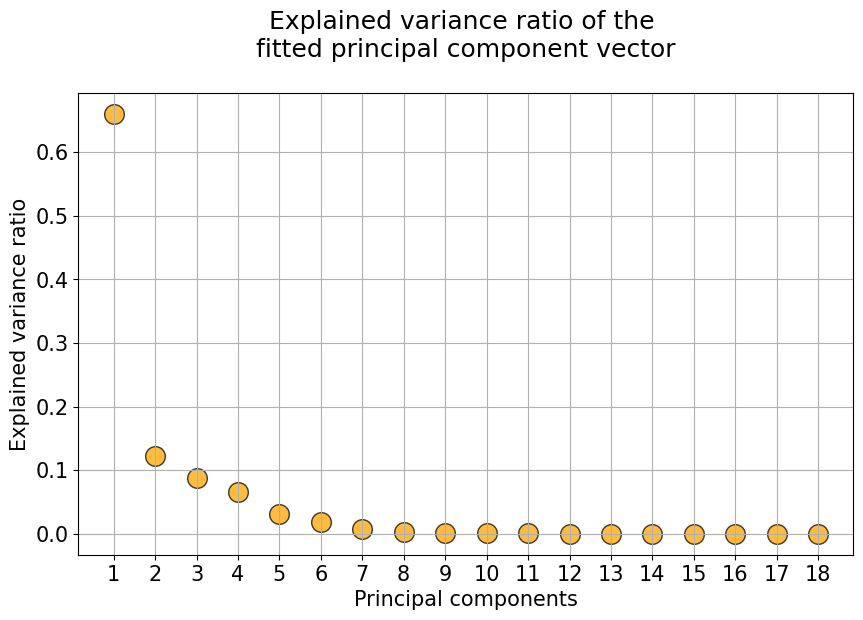

In [178]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(pca_56.explained_variance_ratio_))],
            y=pca_56.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=18)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(pca_56.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

([<matplotlib.axis.XTick at 0x1233a45bb90>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11')])

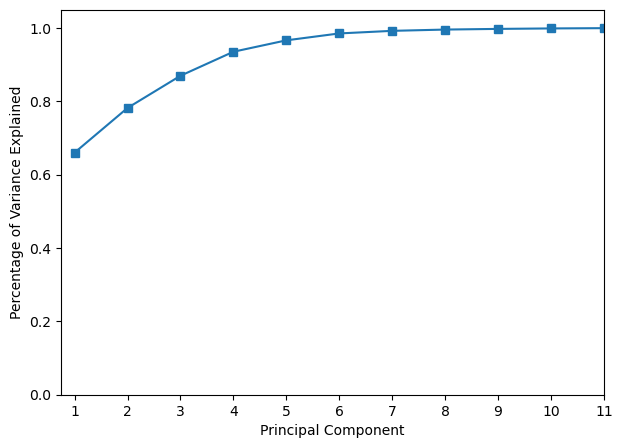

In [179]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], np.cumsum(pca_56.explained_variance_ratio_), '-s')
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11])

In [191]:
# For this we can install via !pip install pca
from pca import pca
# Initialize
df_plot_56 = pca(n_components=6, normalize=True)
df_plot_56

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [18] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


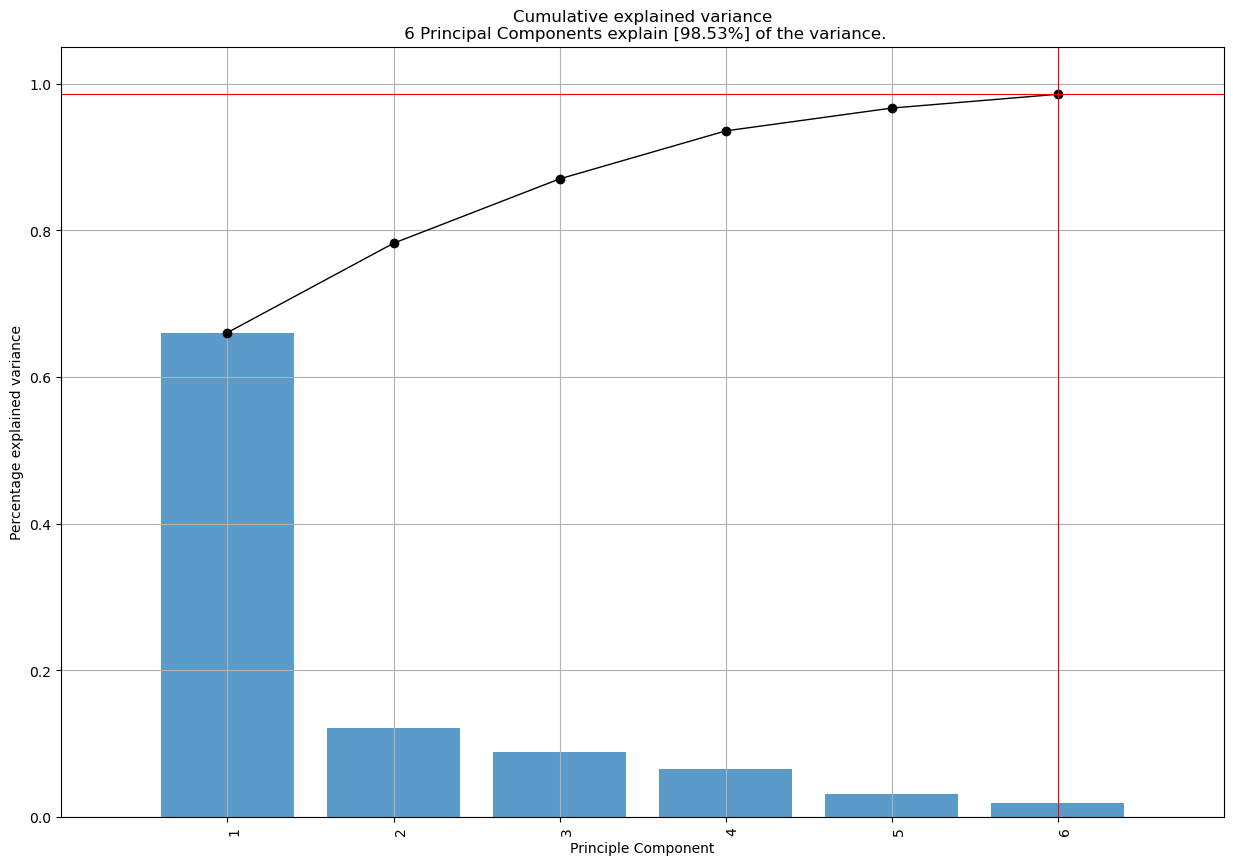

In [192]:
out = df_plot_56.fit_transform(new_df_56)
fig, ax = df_plot_56.plot()

In [196]:
pca_1= sklearn.decomposition.PCA(n_components=6)
pca_1.fit(new_df_wfs)
pca_1.components_

array([[-9.91069842e-02,  1.54956197e-02, -2.52169747e-01,
        -3.92711822e-01, -3.93183758e-01, -3.92617039e-01,
        -3.67281804e-01, -4.23111690e-01,  5.58267160e-02,
        -3.78606906e-01,  1.75556988e-02,  2.10609725e-02,
         1.31241881e-02,  7.94644332e-03,  2.42921407e-02,
         3.05246081e-02,  1.91195448e-02,  1.14068466e-02],
       [ 9.54259453e-01, -1.18382652e-02,  3.72525613e-02,
        -8.28721521e-02,  4.30814705e-02,  4.30385838e-02,
        -1.67044979e-01, -2.75692356e-02, -1.39473397e-01,
        -8.48543335e-02,  4.25229906e-02,  6.06501604e-02,
         2.84465577e-02,  3.22113197e-02,  6.50951777e-02,
         8.20205539e-02,  5.33792385e-02,  2.86387648e-02],
       [ 2.56889942e-01,  7.75578541e-04, -2.04536247e-01,
         1.82617432e-01, -2.70277162e-01, -2.69841085e-01,
         4.81002333e-01, -1.25691561e-01,  6.06679003e-01,
         1.81140424e-01, -5.76709163e-02, -4.81427647e-02,
        -7.90957921e-02,  3.09650352e-02, -1.03442792e

In [197]:
ncomps = 6
column_names = []
for i in range(ncomps):
    column_names.append("PC"+str(i+1))
new_df_pca_1 = pd.DataFrame(np.dot(new_df_56,np.transpose(pca_1.components_)),columns =column_names )

In [198]:
new_df_pca_1.shape, target_56021.shape

((888, 6), (888,))

In [199]:
train_x_1, valid_x_1, train_y_1, valid_y_1 = train_test_split(new_df_pca_1, target_56021, test_size =0.1, random_state=1)

In [200]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)


In [201]:
rf.fit(train_x_1, train_y_1)
feature_importances = rf.feature_importances_
#select feature
feature_importance_df = pd.DataFrame({'Feature': train_x_1.columns, 'Importance': feature_importances})
#sort the feature in order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending = False)

In [202]:
prediction_56= rf.predict(valid_x_1)
prediction_56

array([0.846229, 0.669652, 0.972291, 0.683448, 0.609691, 0.451559,
       2.676355, 1.64561 , 0.428786, 1.148912, 1.278038, 1.845847,
       1.159925, 1.24949 , 2.554496, 0.389567, 0.962471, 1.339669,
       1.710871, 0.45305 , 1.367334, 1.007586, 1.299905, 0.768623,
       1.199124, 1.542894, 0.69054 , 1.57156 , 0.560219, 2.276271,
       1.044953, 0.985552, 1.525599, 1.005513, 1.037588, 0.906652,
       1.300937, 0.494044, 1.11278 , 0.45058 , 1.511467, 1.099443,
       1.101652, 1.334883, 0.52915 , 2.008782, 0.28701 , 1.66293 ,
       2.112021, 0.569335, 0.622121, 0.956427, 1.744123, 1.483378,
       0.784237, 0.523558, 0.841198, 0.980795, 0.876682, 1.245124,
       0.846827, 1.369832, 1.446819, 1.322935, 1.112276, 1.599366,
       1.059878, 0.444296, 1.489776, 0.289054, 1.285778, 1.2124  ,
       0.381863, 1.71242 , 2.016489, 0.908792, 0.895794, 0.593436,
       1.509742, 0.358661, 0.212334, 0.921782, 2.714958, 1.257589,
       1.481749, 1.092818, 0.845056, 0.67876 , 1.126162])

In [203]:
new_valid_y = np.array(np.array(valid_y_1)).astype(int)
new_pred_y = np.array(np.array(prediction_56)).astype(int)
accuracy_56 = accuracy_score(new_valid_y, new_pred_y)
accuracy_56

0.4157303370786517